<a id="section_CART"></a> 
## Workshop Final DS Digital House

<h1 style='background:#3f4788; border:2; font-size:300%; font-weight: bold;
color:white; padding:20px'><center>Análise de Conjunto de Dados de Credit Score</center></h1>

<center><img src = "https://storage.googleapis.com/kaggle-datasets-images/2289007/3846912/ad5e128929f5ac26133b67a6110de7c0/dataset-cover.jpg?t=2022-06-22-14-33-45" width = 900 height = 400/></center>


Você está trabalhando como cientista de dados em uma empresa financeira global. Ao longo dos anos, a empresa coletou dados bancários básicos e reuniu muitas informações relacionadas a crédito de alguns clientes. A gerência quer construir um sistema inteligente para segregar as pessoas em faixas de pontuação de crédito para reduzir os esforços manuais e melhorar a precisão das apurações.

Tarefa
Dadas as informações relacionadas ao crédito de uma pessoa, construa um modelo de aprendizado de máquina que possa classificar a pontuação de crédito.


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">

<h1 style='background:#3f4788; border:0; border-radius: 10px; color:white;padding:20px'><center> Sumário </center></h1>

### [**1. Importando bibliotecas e carregando dados**](#title-one)

### [**2. Data Wrangling**](#title-two)

### [**3. Limpeza de dados**](#title-three)

### [**4. EDA e Visualizações**](#title-four)

### [**5. Pré-processamento de Dados**](#title-five)

### [**6. Feature Importance e Feature Selection**](#title-six)

### [**7. Modelagem**](#title-seven)

<a id="title-one"></a>
<h1 style='background:#3f4788; border:2; border-radius: 10px; color:white;padding:20px'><center>Importando bibliotecas e carregando dados</center></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
pd.set_option('display.max_columns', None)
import missingno as msno
#from dataprep.eda import plot, plot_correlation, create_report, plot_missing

%matplotlib inline

# Definindo fontes
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 30}

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Importando os dados

In [2]:
# importando bases de treino e teste
df_test = pd.read_csv(r"../DataSet/test.csv", low_memory = False)
df_train = pd.read_csv(r"../DataSet/train.csv", low_memory = False)

## Agrupando os datasets para limpar os dados

In [4]:
# concatenando os datasets ja que eles tem as mesmas colunas

df_total = pd.concat([df_train, df_test], ignore_index = True)
df_orig = df_total.copy()

In [5]:
print('dados de treino: ', df_train.shape)
print('dados de teste: ', df_test.shape)
print('todos os dados agrupados: ', df_total.shape)

dados de treino:  (100000, 28)
dados de teste:  (50000, 27)
todos os dados agrupados:  (150000, 28)


In [6]:
df_total.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0      19114.12            1824.843333                  3                4   
1      19114.12                    NaN                  3                4   
2      19114.12                    NaN                  3                4   
3      19114.12                    NaN                  3                4   
4      19114.12            1824.843333                  3                4   

   Interest_Rate Num_of_Loan  \
0              3           4   
1              3           4   
2              3           4   
3              3           4   
4              3           4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

  Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                      7                11.27                   4.0   
1                    NaN                11.27                   4.0   
2                      7                    _                   4.0   
3                      4                 6.27                   4.0   
4                    NaN                11.27                   4.0   

  Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0          _           809.98                 26.822620   
1       Good           809.98                 31.944960   
2       Good           809.98                 28.609352   
3       Good           809.98                 31.377862   
4       Good           809.98                 24.797347   

      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0  22 Years and 1 Months                    No            49.574949   
1                    NaN                    No            49.574949   
2  22 Years and 3 Months                    No            49.574949   
3  22 Years and 4 Months                    No            49.574949   
4  22 Years and 5 Months                    No            49.574949   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good

## Colunas dataset:

* ID - Identificador de entrada
* Customer_ID - ID cliente
* Month - Mês do ano
* Name - nome do cliente
* Age - Idade Cliente
* SSN - Social Security Number (CPF no Brasil)
* Occupation - Ocupação do cliente
* Annual_Income - renda anual
* Monthly_Inhand_Salary - Salario mensal do cliente
* Num_Bank_Accounts - quantidade de contas em bancos
* Num_Credit_Card - quantidade de cartões de crédito
* Interest_Rate - taxa de juros cartão de crédito
* Num_of_Loan - Quantidade de empréstimos feitos no banco
* Type_of_Loan - tipo de empréstimo feito pelo cliente
* Delay_from_due_date - qtd. de dias de atraso pagamento cartão
* Num_of_Delayed_Payment - Média de pagamentos atrasado pelo cliente
* Changed_Credit_Limit - Variação percentual de limite do cartão de crédito
* Num_Credit_Inquiries - Quantidade de "cobranças" no cartão
* Credit_Mix - mix de crédito do cliente
* Outstanding_Debt - restante à ser pago da dívida
* Credit_Utilization_Ratio - Taxa de utlização do cartão de crédito
* Credit_History_Age - Tempo de histórico de crédito do cliente
* Payment_of_Min_Amount - Pagamento minimo
* Total_EMI_per_month - Pagamento fixo em dolares por mes
* Amount_invested_monthly - Quantidade de dinheiro investido pelo cliente mensalmente
* Payment_Behaviour - Comportamento de pagamento cliente
* Monthly_Balance - Saldo Mensal Cliente
* Credit_Score - Target, Pontuação de uso de crédito
* test - coluna utilizada para separar o dataset nos dados de treino e teste

In [7]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  o

#### Porcentagem de dados faltantes

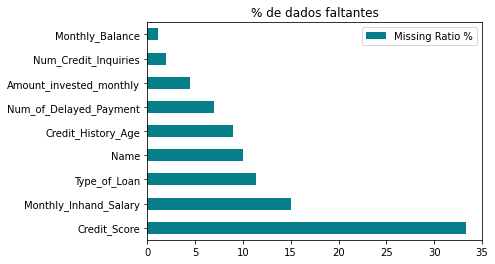

In [8]:
# Esta função define a quantidade % de dados faltantes
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh", color='#087E8B')
        plt.title("% de dados faltantes")
        plt.show()
    else:
        print('No NAs found')
        
plot_nas(df_total)

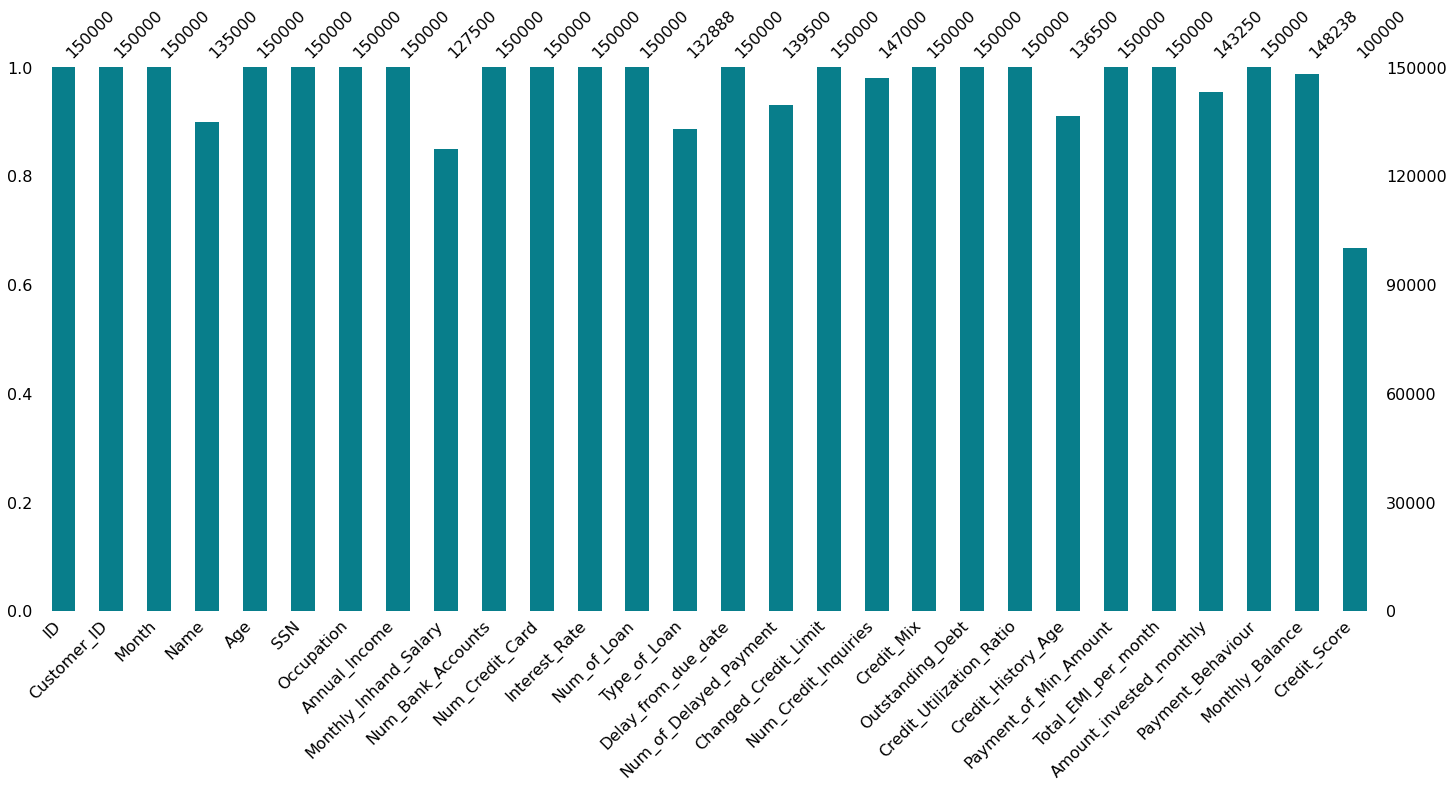

In [9]:
msno.bar(df_total, color='#087E8B');

## Checando os principais valores de algumas colunas

In [10]:
colunas = df_total.columns

for coluna in colunas:
    print('Variavel: ', coluna)
    print(20*'-')
    print(df_total[coluna].value_counts(dropna=False))

Variavel:  ID
--------------------
0x9995     1
0x7268     1
0x243f8    1
0x3562     1
0xaa9e     1
          ..
0x17689    1
0x25022    1
0x18d02    1
0xf3b7     1
0x1f4d1    1
Name: ID, Length: 150000, dtype: int64
Variavel:  Customer_ID
--------------------
CUS_0x238c    12
CUS_0x4a97    12
CUS_0xad3f    12
CUS_0xbd1f    12
CUS_0x9f51    12
              ..
CUS_0x34a3    12
CUS_0x99b8    12
CUS_0x4866    12
CUS_0xa2fd    12
CUS_0x6829    12
Name: Customer_ID, Length: 12500, dtype: int64
Variavel:  Month
--------------------
April        12500
December     12500
July         12500
October      12500
June         12500
May          12500
March        12500
February     12500
August       12500
January      12500
September    12500
November     12500
Name: Month, dtype: int64
Variavel:  Name
--------------------
NaN                  15000
Stevex                  66
Langep                  65
Jessicad                59
Raymondr                58
                     ...  
Giuseppeh     

### Observações

1. Colunas numéricas com "_" ok
    * Age,
    * Annual_Income,
    * Monthly_Inhand_Salary,
    * Num_Bank_Accounts,
    * Num_Credit_Card,
    * Interest_Rate
    * Num_of_Loan
    * Delay_from_due_date
    * Num_of_Delayed_Payment
    * Changed_Credit_Limit
    * Num_Credit_Inquiries
    * Outstanding_Debt
    * Credit_Utilization_Ratio
    * Total_EMI_per_month
    * Amount_invested_monthly
    * Monthly_Balance
2. SSN #F%$D@*&8 ok
3. Occupation _______ ok
4. Type_of_Loan - transformar em lista e indexar
5. Changed_Credit_Limit "_" -> NaN ok
6. Credit_Mix "_" -> NaN ok
7. Credit_History_Age Transformar em qtd. Meses
8. Payment_of_Min_Amount "NM" -> NaN ok
9. Payment_Behaviour "!@9#%8" -> NaN e transformar dado ok

<a id="title-two"></a>
<h1 style='background:#3f4788; border:2; border-radius: 10px; color:white;padding:20px'><center>Data Wrangling</center></h1>

## Ajustando os campos númericos que estão definidos como string por terem underlines em alguns registros

In [11]:
# Campos númericos que estão como string - retirar underline dos numeros

colunas_ul = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
              'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
for row in colunas_ul:
    df_total[row] = df_total[row].str.replace(r'_+', '')

## Data Wrangling

* Limpeza nos campos com dados inconsistentes

In [12]:
# Removendo coluna ID, completamente inútil para a análise
df_total.drop(['ID'], axis = 1, inplace = True)

# removendo caracter estranho do SSN
df_total['SSN'].replace('#F%$D@*&8', np.NaN, inplace=True)

# removendo os underlines e colocando NaN na coluna Occupation
df_total['Occupation'].replace('_______', np.NaN, inplace=True)

df_total['Changed_Credit_Limit'].replace(['_', ''], np.NaN, inplace=True)

df_total['Credit_Mix'].replace('_', np.NaN, inplace=True)

df_total['Payment_of_Min_Amount'].replace('NM', np.NaN, inplace=True)

df_total['Payment_Behaviour'].replace('!@9#%8', np.NaN, inplace=True)

### Convertendo campo de credit history para qtd. Meses
* 1 year = 12 months

In [13]:
# convertendo Credit_History_Age em quantidade de meses
def converter_mes(x):
    if pd.notnull(x):
        ano = int(x.split(' ')[0])
        mes = int(x.split(' ')[3])
        return (ano*12)+mes
    else:
        return x

df_total['Credit_History_age'] = df_total['Credit_History_Age'].apply(lambda x: converter_mes(x)).astype(float)

### Removendo 'and' no preenchimento do campo

In [14]:
df_total['Type_of_Loan_ajustado'] = df_total['Type_of_Loan'].replace("[abc]* and ", " ", regex=True)

### Conversão de dados

In [15]:
#criando dicionario e convertendo os dados

dicionario_conversao = {
    'Age': int,
    'Num_Bank_Accounts': int,
    'Num_Credit_Card': int,
    'Num_of_Loan': int,
    'Num_of_Delayed_Payment': int,
    'Annual_Income' : float,
    'Monthly_Inhand_Salary' : float,
    'Interest_Rate' : float,
    'Delay_from_due_date' : float,
    'Changed_Credit_Limit' : float,
    'Num_Credit_Inquiries' : float,
    'Outstanding_Debt' : float,
    'Credit_Utilization_Ratio' : float,
    'Changed_Credit_Limit' : float,
    'Amount_invested_monthly' : float,
    'Total_EMI_per_month' : float,
    'Num_of_Delayed_Payment' : float,
    'Monthly_Balance' : float,
    'Customer_ID' : object,
    'Name' : object,
    'Month' : object,
    'SSN' : object,
    'Type_of_Loan' : object,
    'Occupation' : object,
    'Credit_Mix' : object,
    'Payment_of_Min_Amount' : object,
    'Payment_Behaviour' : object
    }
# aplicando as type para variaveis

df_total = df_total.astype(dicionario_conversao)

In [16]:
# convertendo mes para encoding

import datetime

df_total['Month'] = df_total['Month'].apply(lambda x: datetime.datetime.strptime(x, '%B').month)

In [17]:
#dropando na

df_nonull = df_total.dropna()

# pegando indices

# df2 = df_nonull.groupby(["Customer_ID"])["Month"].nlargest(1)

# list comprehension para juntar os índices

# indice_final = [i[1] for i in df2.index.values]

# aplicando máscara, pegando somente linha do último mês de cada usuário

# df_nonull_uniqueCID = df_total.loc[indice_final]

df_nonull_uniqueCID = df_nonull.copy() #desistimos de usar esse fatiamento e mantivemos para não renomear todas as variáveis depois

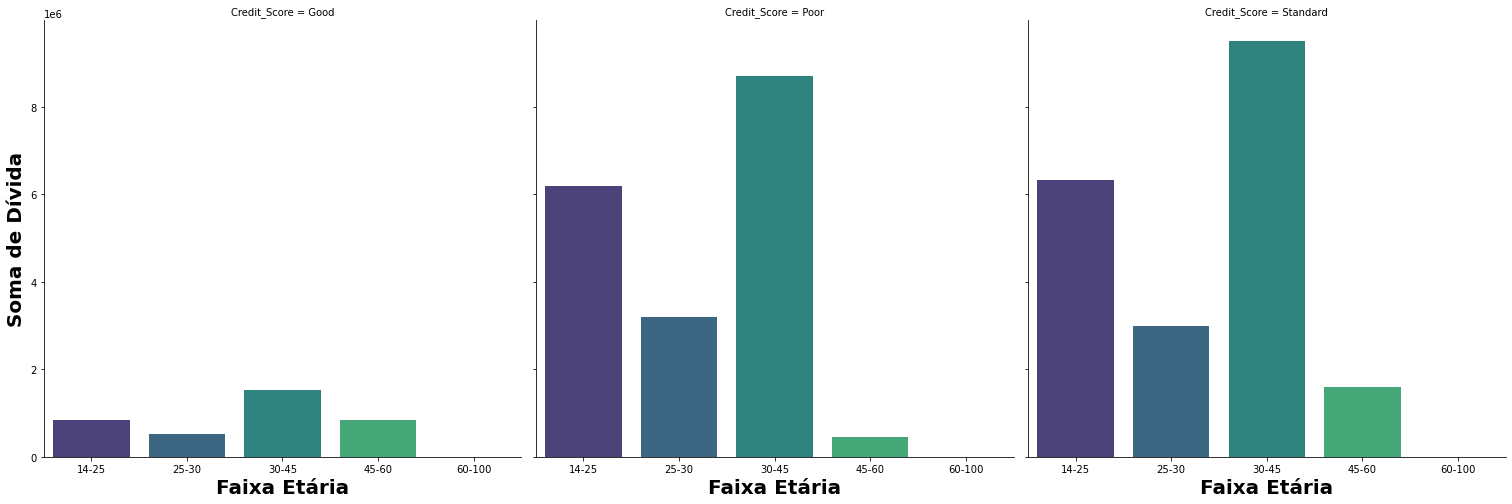

In [18]:
df_agegroup = df_nonull_uniqueCID.copy()

df_agegroup["Age_Group"] = pd.cut(df_agegroup.Age,
                             bins=[14, 25, 30, 45, 60, 100],
                             labels=["14-25", "25-30", "30-45", "45-60", "60-100"],
                            )

age_groups = (df_agegroup.groupby(["Age_Group", "Credit_Score"])["Outstanding_Debt", "Annual_Income", "Num_Bank_Accounts", "Num_Credit_Card"].sum().reset_index())

sns.catplot(data=age_groups,
                x="Age_Group",
                y="Outstanding_Debt",
                height=7,
                aspect=1,
                col="Credit_Score",
                kind="bar",
                ci=None,
                palette='viridis'
               ).set_axis_labels("Faixa Etária", "Soma de Dívida", size=20, fontweight="bold")

plt.show()

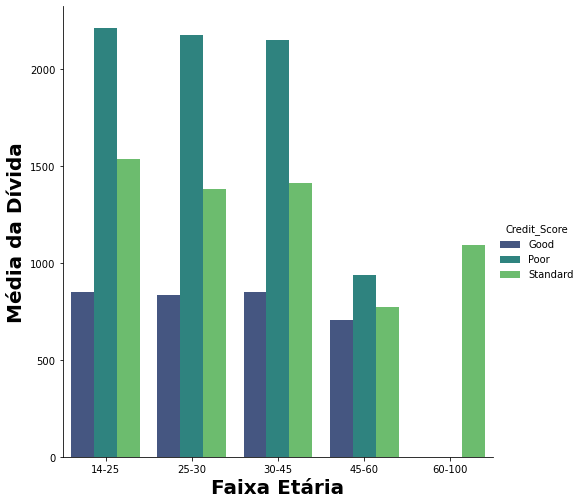

In [19]:
df_agegroup = df_nonull_uniqueCID.copy()

df_agegroup["Age_Group"] = pd.cut(df_agegroup.Age,
                             bins=[14, 25, 30, 45, 60, 100],
                             labels=["14-25", "25-30", "30-45", "45-60", "60-100"],
                            )

age_groups = (df_agegroup.groupby(["Age_Group", 'Credit_Score'])['Outstanding_Debt'].mean().reset_index())

sns.catplot(data=age_groups,
                x="Age_Group",
                y="Outstanding_Debt",
                hue='Credit_Score',
                height=7,
                aspect=1,
                kind="bar",
                ci=None,
                palette='viridis'
               ).set_axis_labels("Faixa Etária", "Média da Dívida", size=20, fontweight="bold")

plt.show()

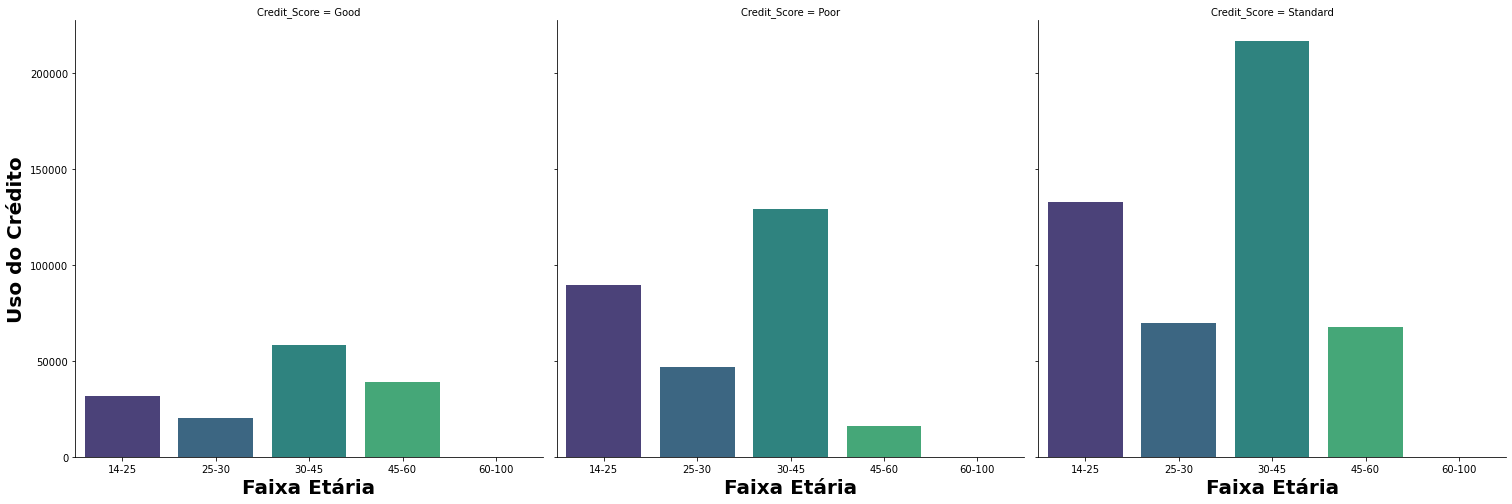

In [20]:
df_agegroup = df_nonull_uniqueCID.copy()

df_agegroup["Age_Group"] = pd.cut(df_agegroup.Age,
                             bins=[14, 25, 30, 45, 60, 100],
                             labels=["14-25", "25-30", "30-45", "45-60", "60-100"],
                            )

age_groups = (df_agegroup.groupby(["Age_Group", "Credit_Score"])["Outstanding_Debt", "Annual_Income", "Num_Bank_Accounts", "Num_Credit_Card","Credit_Utilization_Ratio"].sum().reset_index())

sns.catplot(data=age_groups,
                x="Age_Group",
                y="Credit_Utilization_Ratio",
                height=7,
                aspect=1,
                col="Credit_Score",
                kind="bar",
                ci=None,
                palette='viridis'
               ).set_axis_labels("Faixa Etária", "Uso do Crédito", size=20, fontweight="bold")

plt.show()

In [21]:
df_nonull_uniqueCID.describe()

Month           Age  Annual_Income  Monthly_Inhand_Salary  \
count  29664.000000  29664.000000   2.966400e+04           29664.000000   
mean       4.487830    116.169802   1.730577e+05            4033.583604   
std        2.301204    713.589927   1.415583e+06            3103.126451   
min        1.000000   -500.000000   7.005930e+03             303.645417   
25%        2.000000     24.000000   1.876069e+04            1572.949167   
50%        4.000000     33.000000   3.608059e+04            2997.440000   
75%        7.000000     42.000000   7.013780e+04            5757.740000   
max        8.000000   8682.000000   2.419806e+07           15204.633333   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate   Num_of_Loan  \
count       29664.000000     29664.000000   29664.000000  29664.000000   
mean           17.647519        22.477717      77.967435      3.495618   
std           121.649027       128.001202     487.014681     63.215192   
min            -1.000000         0.000000       1.000000   -100.000000   
25%             4.000000         4.000000       8.000000      2.000000   
50%             6.000000         6.000000      15.000000      4.000000   
75%             8.000000         7.000000      22.000000      6.000000   
max          1798.000000      1499.000000    5797.000000   1480.000000   

       Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
count         29664.000000            29664.000000          29664.000000   
mean             22.024103               32.214570             10.771666   
std              15.264718              232.069147              6.929147   
min              -5.000000               -3.000000             -6.440000   
25%              10.000000                9.000000              5.620000   
50%              19.000000               14.000000              9.710000   
75%              29.000000               19.000000             15.510000   
max              67.000000             4397.000000             36.290000   

       Num_Credit_Inquiries  Outstanding_Debt  Credit_Utilization_Ratio  \
count          29664.000000      29664.000000              29664.000000   
mean              26.901362       1508.583029                 32.219026   
std              185.879255       1193.017251                  5.054038   
min                0.000000          0.230000                 20.881250   
25%                3.000000        602.020000                 28.049650   
50%                6.000000       1236.760000                 32.254849   
75%                9.000000       2137.977500                 36.422780   
max             2594.000000       4998.070000                 49.564519   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  \
count         29664.000000             29664.000000     2.966400e+04   
mean           1400.406449               629.619762    -3.371090e+22   
std            8208.393179              2055.020680     3.352045e+24   
min               4.462837                 0.000000    -3.333333e+26   
25%              41.292980                71.340172     2.643857e+02   
50%              78.480100               130.131952     3.247731e+02   
75%             169.327870               251.636713     4.463714e+02   
max           82204.000000             10000.000000     1.552946e+03   

       Credit_History_age  
count        29664.000000  
mean           213.091660  
std             99.393699  
min              1.000000  
25%            135.000000  
50%            211.000000  
75%            291.000000  
max            404.000000

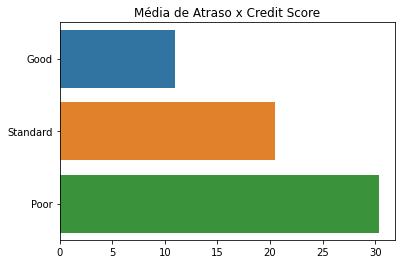

In [22]:
ordem1 = df_nonull_uniqueCID.groupby(['Credit_Score'])['Delay_from_due_date'].mean().sort_values().index

sns.barplot(data = df_nonull_uniqueCID,
            x='Delay_from_due_date',
            y='Credit_Score',
            ci = None,
            order = ordem1)
plt.title('Média de Atraso x Credit Score')
plt.xlabel('')
plt.ylabel('')
plt.show()

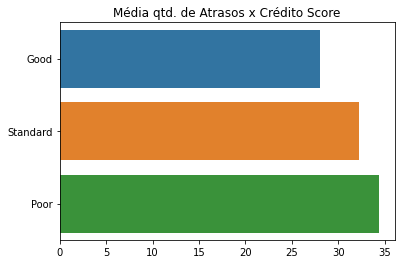

In [23]:
ordem1 = df_nonull_uniqueCID.groupby(['Credit_Score'])['Num_of_Delayed_Payment'].mean().sort_values().index

sns.barplot(data = df_nonull_uniqueCID,
            x='Num_of_Delayed_Payment',
            y='Credit_Score',
            ci = None,
            order = ordem1)
plt.title('Média qtd. de Atrasos x Crédito Score')
plt.xlabel('')
plt.ylabel('')
plt.show()

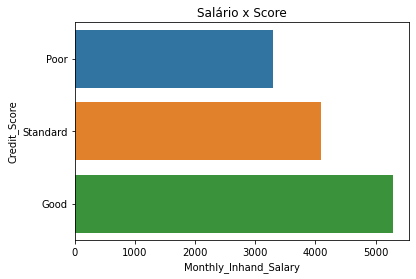

In [24]:
ordem2 = df_nonull_uniqueCID.groupby(['Credit_Score'])['Monthly_Inhand_Salary'].mean().sort_values().index

sns.barplot(data = df_nonull_uniqueCID,
            x='Monthly_Inhand_Salary',
            y='Credit_Score',
            ci = None,
            order = ordem2)

plt.title('Salário x Score')
plt.show()

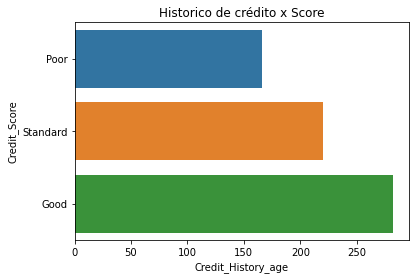

In [25]:
ordem2 = df_nonull_uniqueCID.groupby(['Credit_Score'])['Credit_History_age'].mean().sort_values().index

sns.barplot(data = df_nonull_uniqueCID,
            x='Credit_History_age',
            y='Credit_Score',
            ci = None,
            order = ordem2)

plt.title('Historico de crédito x Score')
plt.show()

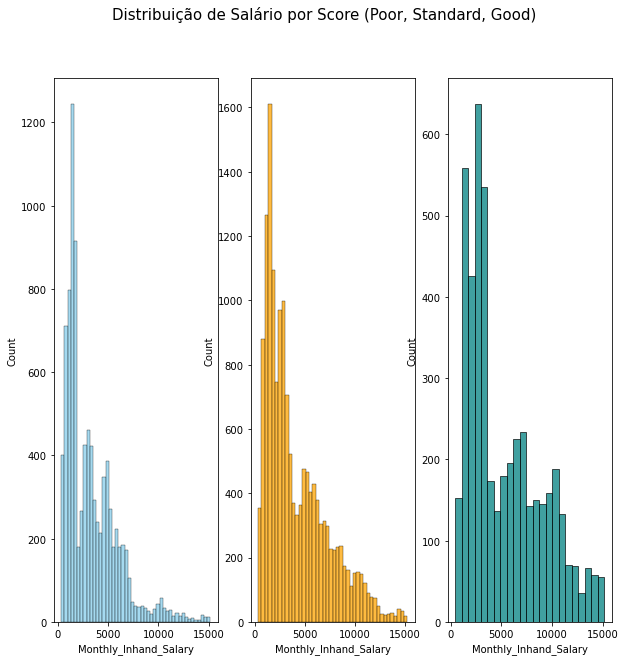

In [26]:
fig, axs = plt.subplots(1, 3, figsize = (10,10))

sns.histplot(data = df_nonull_uniqueCID[df_nonull_uniqueCID['Credit_Score'] == 'Poor'], x = 'Monthly_Inhand_Salary', ax = axs[0], color = 'skyblue')
sns.histplot(data = df_nonull_uniqueCID[df_nonull_uniqueCID['Credit_Score'] == 'Standard'], x = 'Monthly_Inhand_Salary', ax = axs[1], color = 'orange')
sns.histplot(data = df_nonull_uniqueCID[df_nonull_uniqueCID['Credit_Score'] == 'Good'], x = 'Monthly_Inhand_Salary', ax = axs[2], color = 'teal')

fig.suptitle('Distribuição de Salário por Score (Poor, Standard, Good)', size = 15)
plt.show()

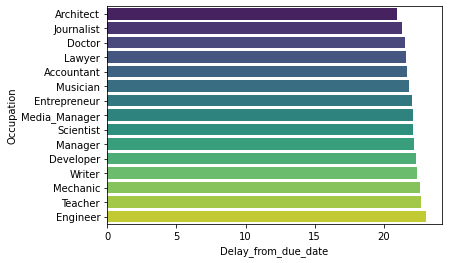

In [27]:
ordem1 = df_nonull_uniqueCID.groupby(['Occupation'])['Delay_from_due_date'].mean().sort_values().index

sns.barplot(data = df_nonull_uniqueCID,
            x='Delay_from_due_date',
            y='Occupation',
            ci = None,
            order = ordem1,
            palette='viridis')
plt.show()

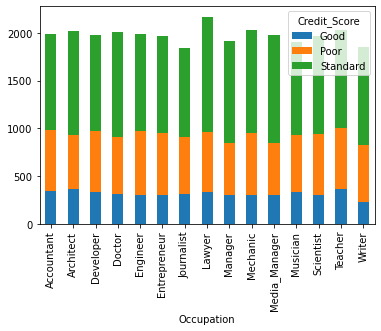

In [28]:
df_plot = df_nonull_uniqueCID.groupby(['Occupation', 'Credit_Score']).size().reset_index().pivot(columns='Credit_Score', index='Occupation', values=0)

df_plot.plot(kind='bar', stacked=True)
plt.show()

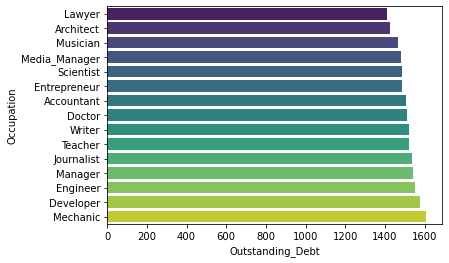

In [29]:
ordem1 = df_nonull_uniqueCID.groupby(['Occupation'])['Outstanding_Debt'].mean().sort_values().index

sns.barplot(data = df_nonull_uniqueCID,
            x='Outstanding_Debt',
            y='Occupation',
            ci = None,
            order = ordem1,
            palette='viridis')
plt.show()

In [30]:
# numCols = df_total.select_dtypes([np.number]).columns

# for col in numCols:
#     fig, ax = plt.subplots(1, 2, figsize = (8,8))
#     sns.boxplot(data=df_total, y=col, x = 'Credit_Score', ax=ax[0])
#     sns.scatterplot(data=df_total,x = 'Credit_Score', s = 100, y=col, ax=ax[1], color ='#ee1199')
#     plt.show()

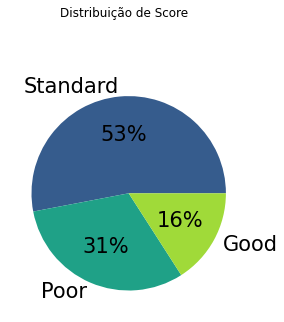

In [31]:
plt.figure(figsize=(5,5))

plt.pie(df_nonull_uniqueCID.Credit_Score.value_counts(normalize=True),
        labels=['Standard', 'Poor', 'Good'],
        textprops={'fontsize': 21},
        colors = sns.color_palette('viridis')[1:6:2],
        autopct='%.0f%%'
        )

plt.suptitle("Distribuição de Score")
plt.subplots_adjust(top=0.80)
plt.show();

In [32]:
# plt.figure(figsize=(20,18))
# sns.heatmap(df_total.corr(),annot=True,cmap='viridis', linewidths=1, linecolor='k', fmt='.2f')

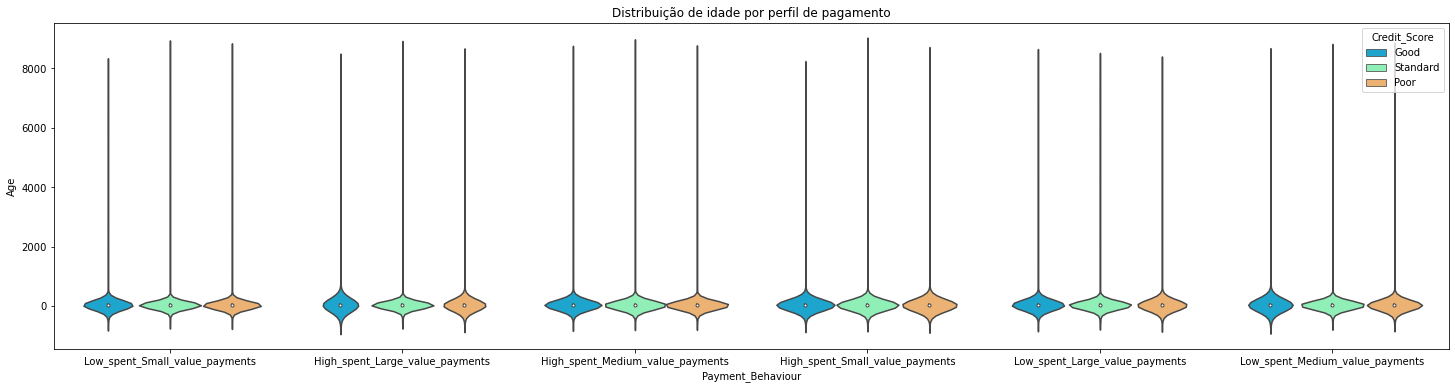

In [33]:
plt.figure(figsize=(25,6))
sns.violinplot(x='Payment_Behaviour',y='Age',data=df_nonull_uniqueCID, hue='Credit_Score', palette='rainbow')
plt.title("Distribuição de idade por perfil de pagamento")
plt.show()

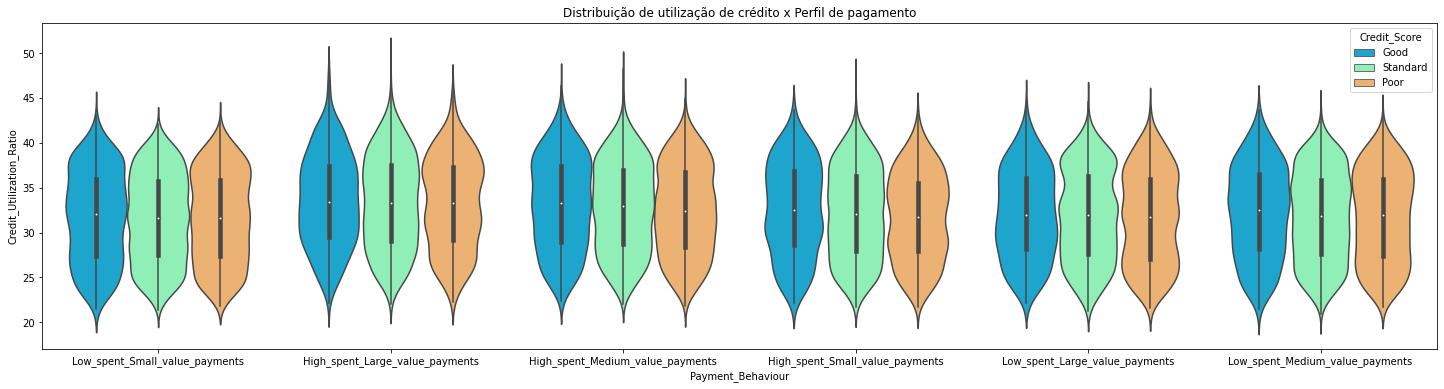

In [34]:
plt.figure(figsize=(25,6))
sns.violinplot(x='Payment_Behaviour',y='Credit_Utilization_Ratio',data=df_nonull_uniqueCID, hue='Credit_Score', palette='rainbow')
plt.title("Distribuição de utilização de crédito x Perfil de pagamento")
plt.show()

<Figure size 4248x72 with 0 Axes>

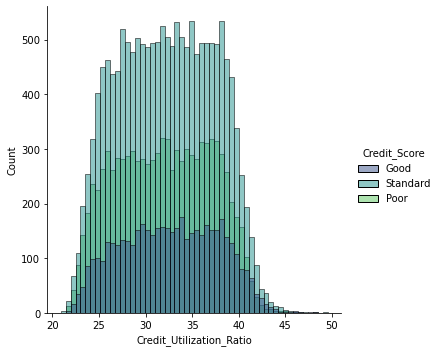

In [35]:
plt.figure(figsize=(59,1))
sns.displot(data=df_nonull_uniqueCID, x="Credit_Utilization_Ratio", palette='viridis', hue='Credit_Score')

<Figure size 4248x72 with 0 Axes>

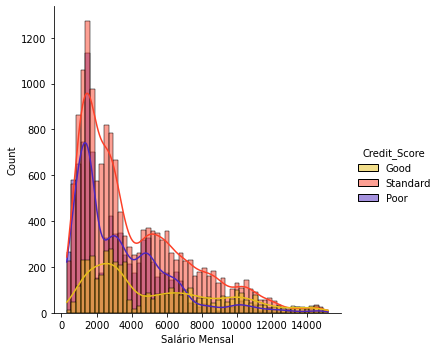

In [36]:
plt.figure(figsize=(59,1))
sns.displot(data=df_nonull_uniqueCID, x="Monthly_Inhand_Salary", kde=True, palette='CMRmap_r', hue='Credit_Score');
plt.xlabel('Salário Mensal');

<Figure size 4248x72 with 0 Axes>

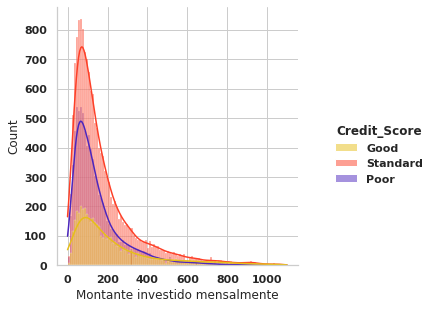

In [98]:
plt.figure(figsize=(59,1))
sns.displot(data=df_nonull_uniqueCID[df_nonull_uniqueCID['Amount_invested_monthly']<1100], x="Amount_invested_monthly", kde=True, palette='CMRmap_r', hue='Credit_Score');
plt.xlabel('Montante investido mensalmente');

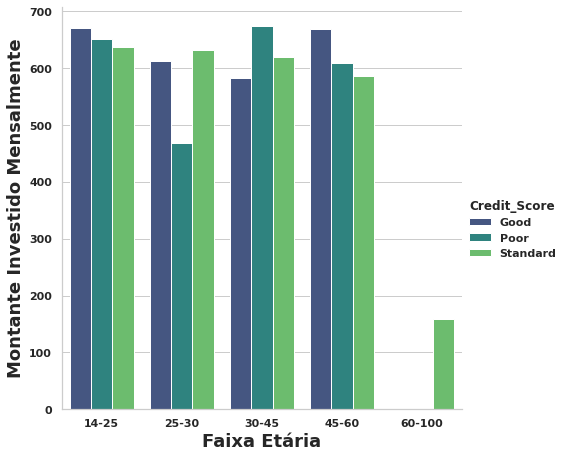

In [90]:
df_agegroup = df_nonull_uniqueCID.copy()

df_agegroup["Age_Group"] = pd.cut(df_agegroup.Age,
                             bins=[14, 25, 30, 45, 60, 100],
                             labels=["14-25", "25-30", "30-45", "45-60", "60-100"],
                            )

age_groups = (df_agegroup.groupby(["Age_Group", 'Credit_Score'])['Amount_invested_monthly'].mean().reset_index())

sns.catplot(data=age_groups,
                x="Age_Group",
                y="Amount_invested_monthly",
                hue='Credit_Score',
                height=7,
                aspect=1,
                kind="bar",
                ci=None,
                palette='viridis'
               ).set_axis_labels("Faixa Etária", "Montante Investido Mensalmente", size=18, fontweight="bold")

plt.show()

<a id="title-four"></a>
<h1 style='background:#3f4788; border:2; border-radius: 10px; color:white;padding:20px'><center>Pré-processamento de Dados</center></h1>

### Drops vars. inúteis, Normalização, Encoding, Splits etc.

In [37]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

df_processado = df_nonull_uniqueCID.copy()
df_processado = df_processado.drop(['Customer_ID', 'Name', 'SSN', 'Type_of_Loan', 'Type_of_Loan_ajustado',
                                    'Credit_History_Age', 'Credit_Score', 'Month', 'Monthly_Balance',
                                    'Occupation', 'Payment_Behaviour'], axis=1)

#Pegando variáveis categóricas e numéricas

categorical = list(df_processado.select_dtypes(include=['object']).columns)  #Talvez criar no começo pra visualizaçao describe().transpose()
numerical = list(df_processado.select_dtypes(include=['int64', 'float64']).columns) #Talvez criar no começo pra visualizaçao describe()

# Dummy Encoder para variáveis categóricas

df_processado_categoricals = pd.DataFrame(columns = categorical, index = df_processado.index)
for col in df_processado.select_dtypes('object'):
    df_processado_categoricals[col], _ = df_processado[col].factorize()

#Scaling para variáveis numéricas

from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()

df_processado_numericals = pd.DataFrame(stdscaler.fit_transform(df_processado[numerical]), columns = numerical, index = df_processado_categoricals.index)

#Concatenando categóricas encodadas e numéricas escaladas

df_processado_final = pd.concat([df_processado_numericals, df_processado_categoricals], axis=1)

#Ordinal Encoder na target

from sklearn.preprocessing import OrdinalEncoder
ordenc = OrdinalEncoder()

df_processado_final['Credit_Score'] = ordenc.fit_transform(df_nonull_uniqueCID['Credit_Score'].values.reshape(-1,1)).astype(int)

#Definindo X e y

X = df_processado_final.drop(['Credit_Score'], axis = 1)
y = df_processado_final['Credit_Score']

X_todas_feats = df_nonull_uniqueCID.drop(['Customer_ID', 'Name', 'SSN', 'Type_of_Loan', 'Type_of_Loan_ajustado'], axis=1)
for col in X_todas_feats.select_dtypes('object'):
    X_todas_feats[col], _ = X_todas_feats[col].factorize()
    
for col in X_todas_feats.select_dtypes(['int64', 'float64']):
    X_todas_feats[col] = stdscaler.fit_transform(X_todas_feats[col].values.reshape(-1,1))

#Splitando o dataframe processado

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

X_train_todas_feats, X_test_todas_feats, y_train_todas_feats, y_test_todas_feats = train_test_split(X_todas_feats, y, test_size=0.2, stratify = y, random_state=42)

print('Shape dos splits com features seleciondadas (X_train, X_test, y_train, y_test): ')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print('\nShape dos splits com todas as features ("): ')
print(X_train_todas_feats.shape, X_test_todas_feats.shape, y_train_todas_feats.shape, y_test_todas_feats.shape)

Shape dos splits com features seleciondadas (X_train, X_test, y_train, y_test): 
(23731, 14) (5933, 14) (23731,) (5933,)

Shape dos splits com todas as features ("): 
(23731, 24) (5933, 24) (23731,) (5933,)


In [38]:
print('Encoding da target: ',{'0': ordenc.categories_[0][0],
       '1': ordenc.categories_[0][1],
       '2': ordenc.categories_[0][2]})

Encoding da target:  {'0': 'Good', '1': 'Poor', '2': 'Standard'}


<a id="title-five"></a>
<h1 style='background:#3f4788; border:2; border-radius: 10px; color:white;padding:20px'><center>Feature Importance e Feature Selection</center></h1>

In [39]:
df_processado_final.columns

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Credit_History_age',
       'Credit_Mix', 'Payment_of_Min_Amount', 'Credit_Score'],
      dtype='object')

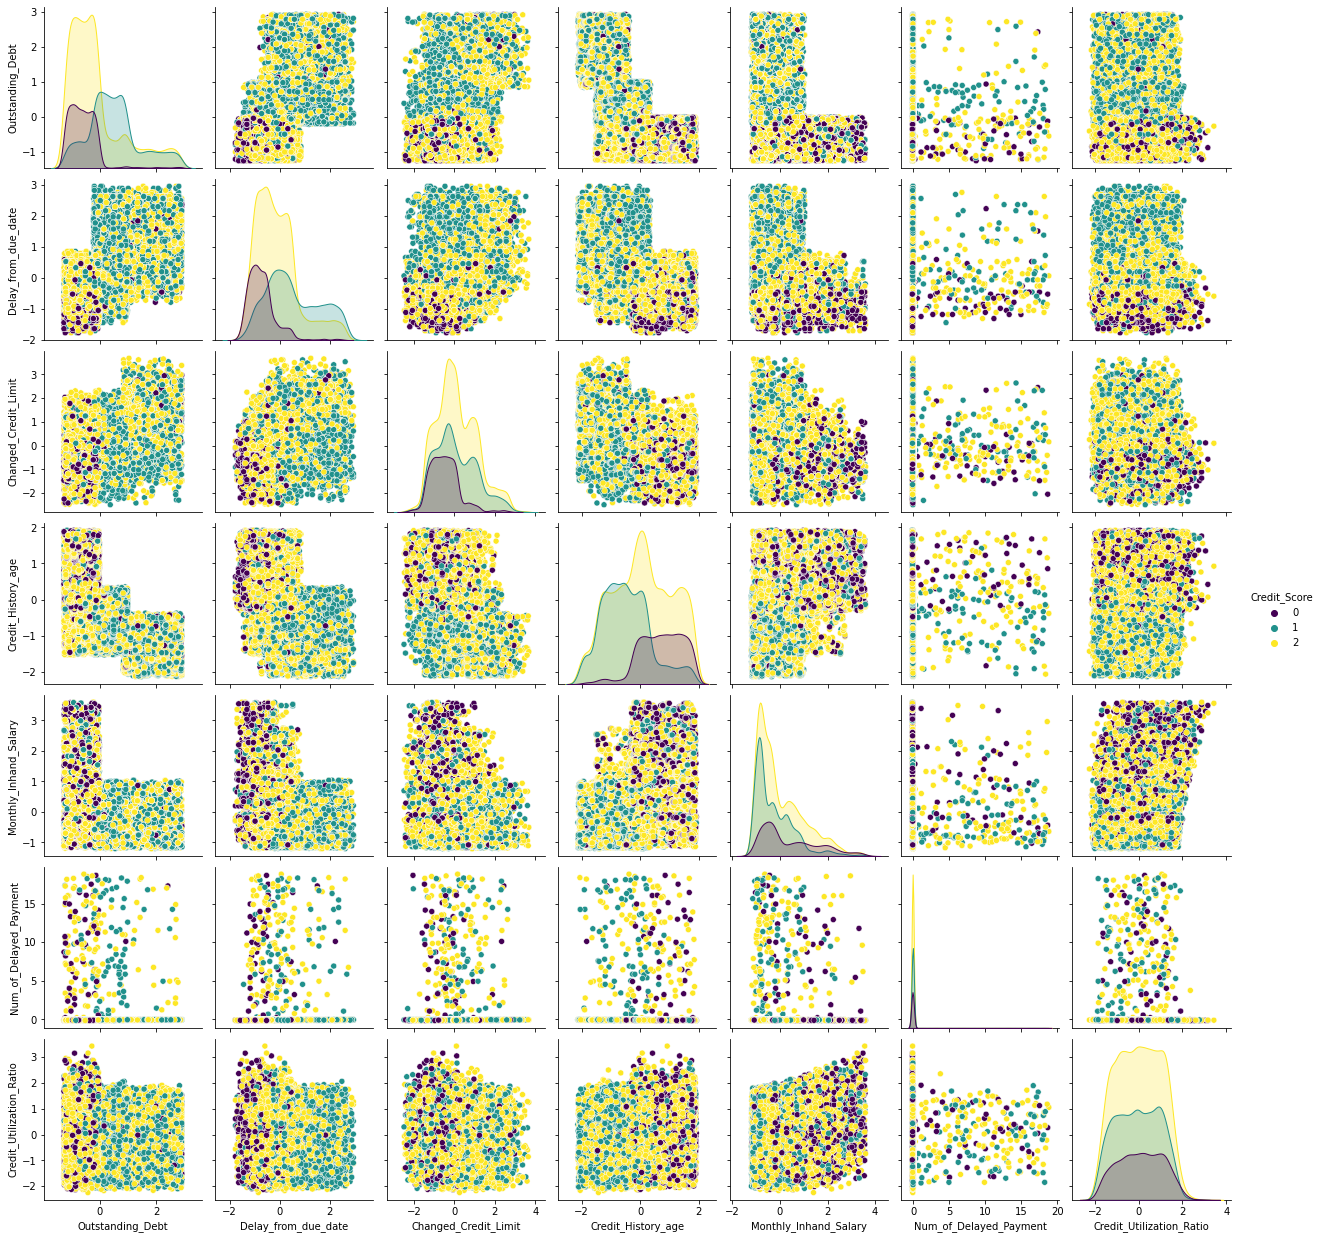

In [40]:
feat_imp = ['Outstanding_Debt','Delay_from_due_date','Changed_Credit_Limit','Credit_History_age',
            'Monthly_Inhand_Salary','Num_of_Delayed_Payment','Credit_Utilization_Ratio', 'Credit_Score']

sns.pairplot(df_processado_final[feat_imp], hue='Credit_Score', palette='viridis')

In [41]:
def Distribution(columne,data,i):
    fig, ax = plt.subplots(1,2, figsize = (15,5))
    font_dict = {'fontsize': 14}
    title=['Antes do processamento','Depois do processamento']
    ax = np.ravel(ax)
    if i==1:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data,x=columne, ax = ax[0],color='r').set_title(title[i])
        sns.boxplot(data=data,x=columne, ax = ax[1],palette='magma').set_title(title[i])
    else:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data,x=columne, ax = ax[0],color='#2171b5').set_title(title[i])
        sns.boxplot(data=data,x=columne, ax = ax[1],color='#2171b5').set_title(title[i])
        
    ax = np.reshape(ax, (1, 2))
    plt.tight_layout()

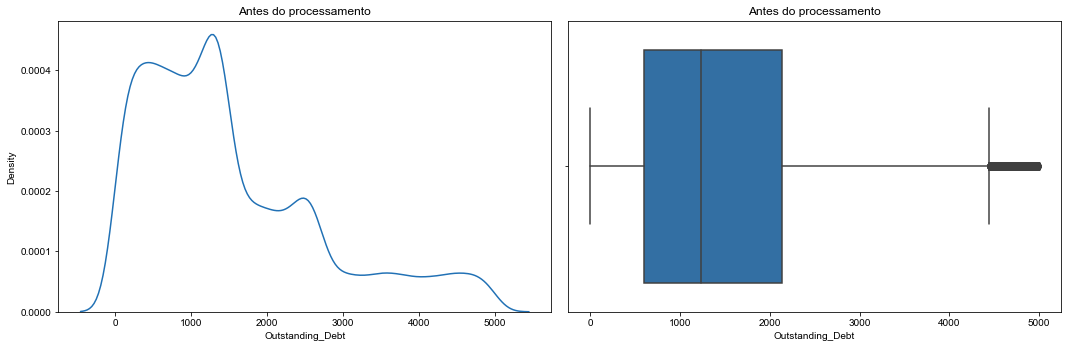

In [42]:
Distribution(columne = 'Outstanding_Debt', data = df_nonull_uniqueCID, i = 0)

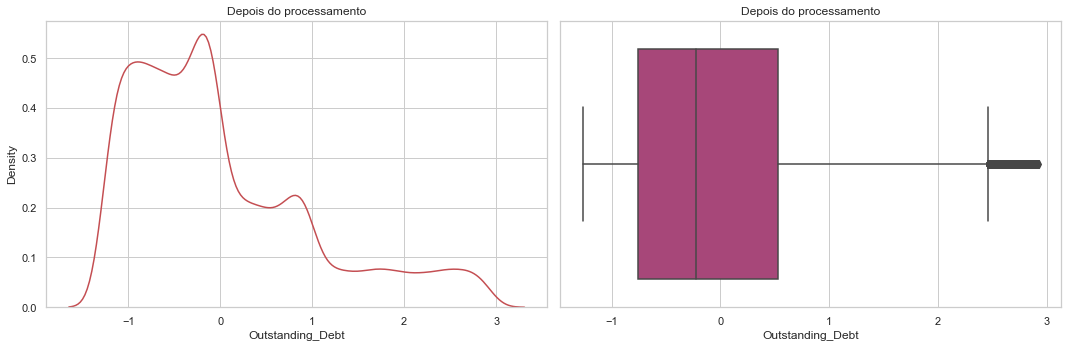

In [43]:
Distribution(columne = 'Outstanding_Debt', data = df_processado_final, i = 1)

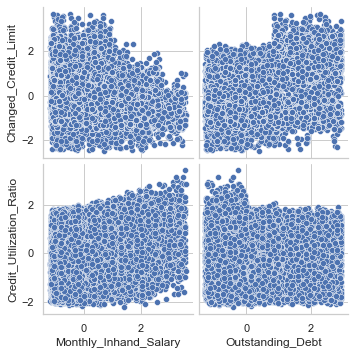

In [44]:
from turtle import color


sns.pairplot(df_processado_final,
             x_vars=['Monthly_Inhand_Salary','Outstanding_Debt'],
             y_vars=['Changed_Credit_Limit','Credit_Utilization_Ratio'])

### StatsModels.summary() e VIF

In [45]:
# Modelo Statsmodels para teste de hipótese e seleção de features

# X_train = sm.add_constant(X_train)
# X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train)
non_reg_OLS = model.fit()
non_reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Credit_Score   R-squared (uncentered):                   0.761
Model:                            OLS   Adj. R-squared (uncentered):              0.761
Method:                 Least Squares   F-statistic:                              5390.
Date:                Sun, 16 Oct 2022   Prob (F-statistic):                        0.00
Time:                        17:48:02   Log-Likelihood:                         -27237.
No. Observations:               23731   AIC:                                  5.450e+04
Df Residuals:                   23717   BIC:                                  5.461e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Annual_Income                0.0040      0.005      0.795      0.426      -0.006       0.014
Monthly_Inhand_Salary        0.0601      0.005     11.317      0.000       0.050       0.071
Interest_Rate               -0.0025      0.005     -0.507      0.612      -0.012       0.007
Delay_from_due_date         -0.2732      0.006    -42.696      0.000      -0.286      -0.261
Num_of_Delayed_Payment      -0.0039      0.005     -0.788      0.431      -0.014       0.006
Changed_Credit_Limit         0.0475      0.006      7.966      0.000       0.036       0.059
Num_Credit_Inquiries        -0.0038      0.005     -0.753      0.451      -0.014       0.006
Outstanding_Debt            -0.3066      0.008    -40.083      0.000      -0.322      -0.292
Credit_Utilization_Ratio     0.0064      0.005      1.281      0.200      -0.003       0.016
Total_EMI_per_month          0.0012      0.005      0.246      0.806      -0.008       0.011
Amount_invested_monthly     -0.0016      0.005     -0.331      0.741      -0.011       0.008
Credit_History_age           0.1930      0.007     28.232      0.000       0.180       0.206
Credit_Mix                   0.9887      0.011     87.275      0.000       0.967       1.011
Payment_of_Min_Amount        0.4212      0.017     24.761      0.000       0.388       0.455
==============================================================================
Omnibus:                      129.302   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.722
Skew:                          -0.070   Prob(JB):                     2.22e-22
Kurtosis:                       2.715   Cond. No.                         7.68
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#VIF
def calc_vif(data):
    vif_df = pd.DataFrame(columns=['Var', 'VIF'])
    x_var_names = data.columns
    
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop(x_var_names[i])]
        r2 = sm.OLS(y, x).fit().rsquared
        vif = round(1/(1-r2),3)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by='VIF',axis = 0, ascending=False, inplace=False)

calc_vif(X_train)

Var    VIF
12                Credit_Mix  8.005
13     Payment_of_Min_Amount  7.464
7           Outstanding_Debt  2.393
11        Credit_History_age  1.905
3        Delay_from_due_date  1.680
5       Changed_Credit_Limit  1.454
1      Monthly_Inhand_Salary  1.154
8   Credit_Utilization_Ratio  1.027
10   Amount_invested_monthly  1.003
0              Annual_Income  1.001
4     Num_of_Delayed_Payment  1.001
6       Num_Credit_Inquiries  1.001
2              Interest_Rate  1.000
9        Total_EMI_per_month  1.000

### ExtraTreeClassifier - método model.feature_importances_

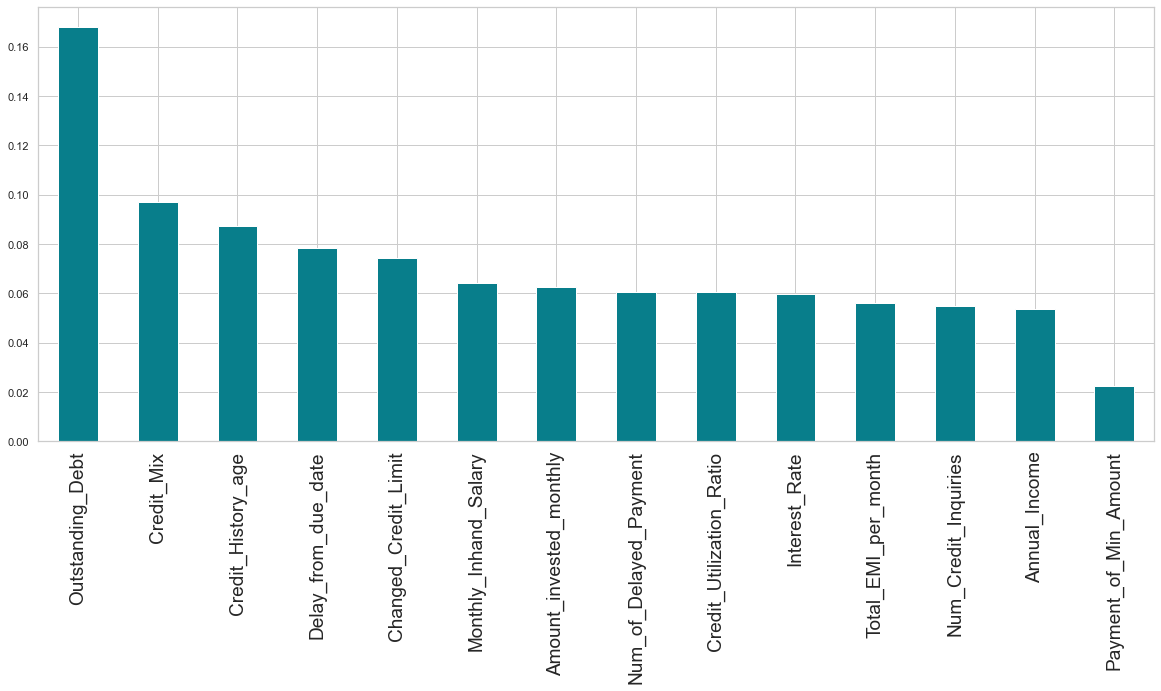

In [47]:
#ExtraTreeClassifier para feature_importances_

from sklearn.tree import ExtraTreeClassifier

xtc = ExtraTreeClassifier()
xtc.fit(X_train, y_train)
feat_importance = pd.Series(xtc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(20,8))
feat_importance.plot(kind='bar', color='#087E8B')
plt.xticks(fontsize=19);

### PCA

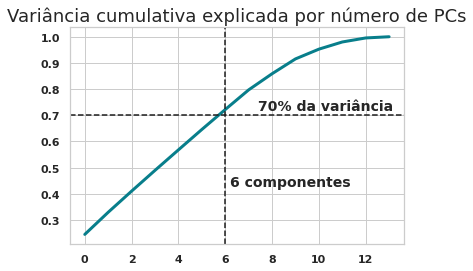

In [106]:
# Visualização da Análise de Componentes Principais (PCA)
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.axhline(0.7, ls='--', color='k')
plt.axvline(6, ls='--', color='k')
plt.text(7.4, 0.72, '70% da variância', fontsize=14)
plt.text(6.2, 0.43, '6 componentes', fontsize=14)
plt.title('Variância cumulativa explicada por número de PCs', size=18)
plt.show()

In [107]:
print('Número de componentes principais para explicar pelo menos 70% da variância: {}'.format(np.argmax(pca.explained_variance_ratio_.cumsum() > 0.7)))
print(f'9 Componentes principais explicam: {pca.explained_variance_ratio_[:7].sum().round(4)*100}% da variância')

Número de componentes principais para explicar pelo menos 70% da variância: 6
9 Componentes principais explicam: 72.2% da variância


<AxesSubplot:>

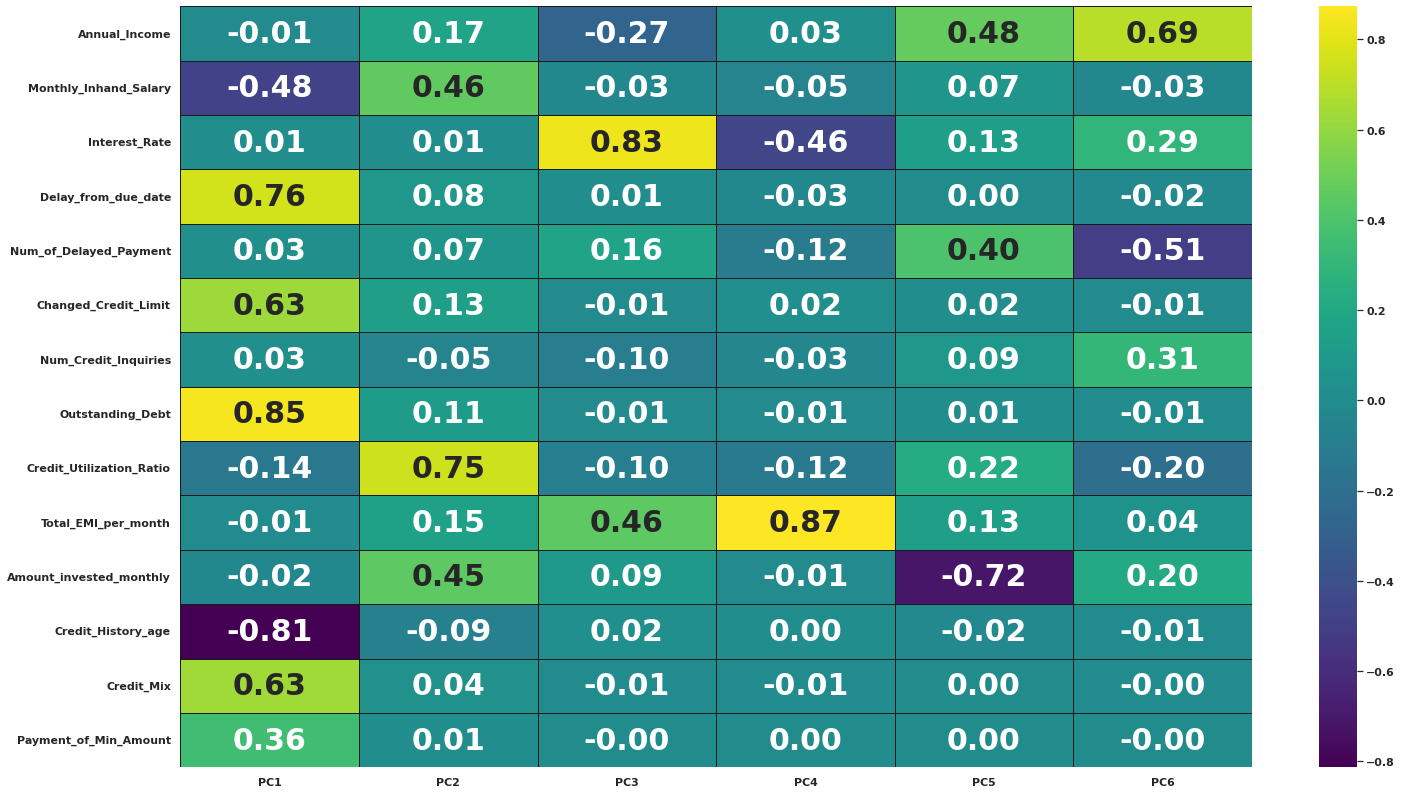

In [108]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)

plt.figure(figsize=(24,14))
sns.heatmap(loadings.iloc[:,:np.argmax(pca.explained_variance_ratio_.cumsum() > 0.7)], annot=True, cmap='viridis', linewidths=1, linecolor='k', fmt='.2f')

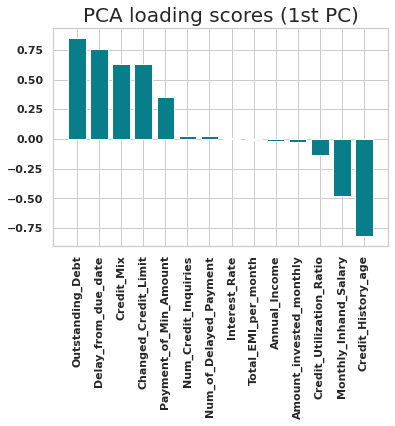

In [114]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (1st PC)', size=20)
plt.xticks(rotation='vertical')
plt.show()

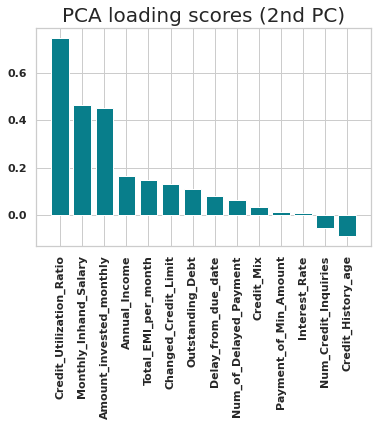

In [113]:
pc2_loadings = loadings.sort_values(by='PC2', ascending=False)[['PC2']]
pc2_loadings = pc2_loadings.reset_index()
pc2_loadings.columns = ['Attribute', 'CorrelationWithPC2']

plt.bar(x=pc2_loadings['Attribute'], height=pc2_loadings['CorrelationWithPC2'], color='#087E8B')
plt.title('PCA loading scores (2nd PC)', size=20)
plt.xticks(rotation='vertical')
plt.show()

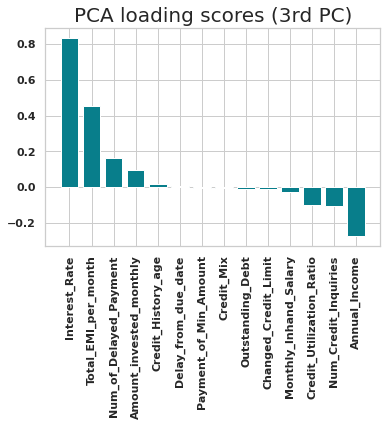

In [112]:
pc3_loadings = loadings.sort_values(by='PC3', ascending=False)[['PC3']]
pc3_loadings = pc3_loadings.reset_index()
pc3_loadings.columns = ['Attribute', 'CorrelationWithPC3']

plt.bar(x=pc3_loadings['Attribute'], height=pc3_loadings['CorrelationWithPC3'], color='#087E8B')
plt.title('PCA loading scores (3rd PC)', size=20)
plt.xticks(rotation='vertical')
plt.show()

Outstanding_Debt            0.392537
Monthly_Inhand_Salary       0.338300
Annual_Income               0.331393
Total_EMI_per_month         0.294468
Interest_Rate               0.177713
Credit_Mix                  0.174370
Payment_of_Min_Amount       0.123686
Delay_from_due_date         0.116934
Num_Credit_Inquiries        0.113582
Changed_Credit_Limit        0.108946
Credit_History_age          0.108403
Num_of_Delayed_Payment      0.083136
Amount_invested_monthly     0.009936
Credit_Utilization_Ratio    0.002543
Name: MI Scores, dtype: float64


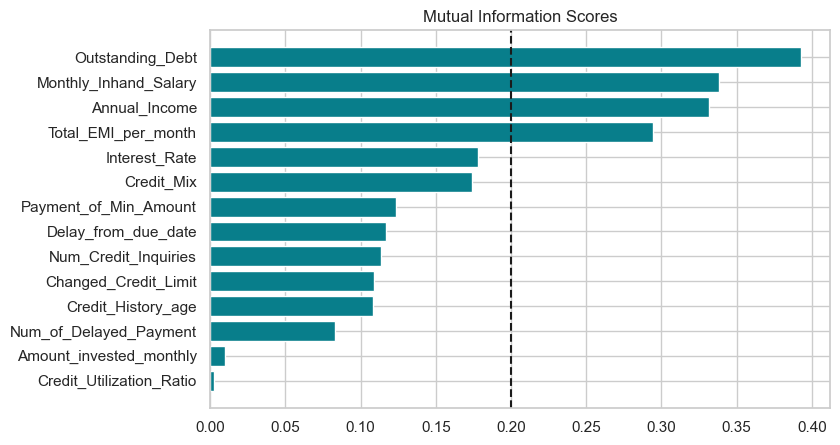

In [52]:
from turtle import color
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores, color='#087E8B')
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

discrete_features = X.dtypes == int
mi_scores = make_mi_scores(X, y, discrete_features)

print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)
plt.axvline(0.2, color='k', linestyle='--')

### Meme do homem-aranha apontando pro homem-aranha

<img src='img/meme-homem-aranha.JPG' width=30% height=40%>

<a id="title-six"></a>
<h1 style='background:#3f4788; border:2; border-radius: 10px; color:white;padding:20px'><center>Modelagem</center></h1>

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, auc, accuracy_score, f1_score, precision_score, recall_score, accuracy_score


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.dummy import DummyClassifier

from skopt import BayesSearchCV

In [54]:
# Criando comparação de acurácia entre os 5 modelos escolhidos

comparacao_modelos = pd.DataFrame(columns = ['Modelo', 'Score'])

modelos = [LogisticRegression(solver='liblinear', random_state=42),
           KNeighborsClassifier(n_neighbors=41, p=4),
           DecisionTreeClassifier(random_state=42),
           RandomForestClassifier(random_state=42),
           XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
           ExtraTreeClassifier(random_state=42),
           MLPClassifier(solver='sgd', random_state=42, max_iter=500),
           ]

for model in modelos:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')
    comparacao_modelos.loc[len(comparacao_modelos)] = [model_name, scores.mean().round(4)]

print('* Comparação Cross-Validation-Score entre vários modelos: ')
comparacao_modelos

* Comparação Cross-Validation-Score entre vários modelos: 


Modelo   Score
0      LogisticRegression  0.6108
1    KNeighborsClassifier  0.6647
2  DecisionTreeClassifier  0.6529
3  RandomForestClassifier  0.7470
4           XGBClassifier  0.7248
5     ExtraTreeClassifier  0.6248
6           MLPClassifier  0.6749

### Modelo Baseline: Dummy Classifier

In [55]:
dummymodel = DummyClassifier(strategy='prior')
dummymodel.fit(X_train, y_train)

y_pred_dummy = dummymodel.predict(X_test)

Acurácia:  0.5301


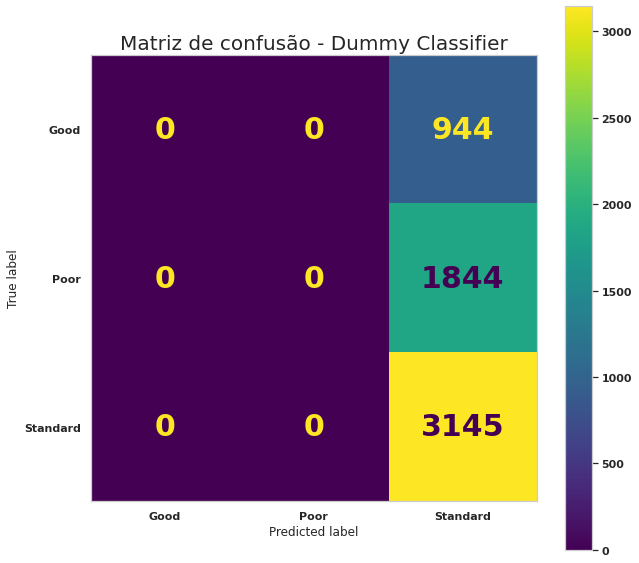

In [116]:
print('Acurácia: ', accuracy_score(y_test, y_pred_dummy).round(4))
cmp1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dummy), display_labels=['Good', 'Poor', 'Standard'])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmp1.plot(ax=ax)
plt.rc('font', **font)
plt.title('Matriz de confusão - Dummy Classifier', fontsize = 20)
plt.show()

In [57]:
r_auc_dummy = roc_auc_score(y_test, dummymodel.predict_proba(X_test), multi_class = 'ovo')
print('Dummy Classifier tem AUROC = %.3f' % (r_auc_dummy))

Dummy Classifier tem AUROC = 0.500


### 1º Modelo: Extra Trees Classifier

In [58]:
# #Otimização Bayesiana de hiperparâmetros
# xtclf = ExtraTreesClassifier(n_jobs=-1)
# xt_params = {'n_estimators':[2000],
#                 'criterion': ['gini'],
#                 'bootstrap':[True]
#                 }

# bayessearch_xt = BayesSearchCV(xtclf,
#                                   xt_params,
#                                   cv=5,
#                                   refit=['accuracy', 'f1'],
#                                   n_jobs=-1,
#                                   verbose=1,
#                                   random_state=42
#                                   ).fit(X_train, y_train)

# y_pred_xt = bayessearch_xt.predict(X_test)
# bayessearch_xt.best_params_

In [59]:
# OrderedDict([('bootstrap', True),
#              ('criterion', 'gini'),
#              ('n_estimators', 2000)])

xtclf = ExtraTreesClassifier(n_jobs=-1,
                             bootstrap=True,
                             criterion='gini',
                             n_estimators=2000).fit(X_train, y_train)

y_pred_xt = xtclf.predict(X_test)

              precision    recall  f1-score   support

           0       0.62      0.68      0.65       944
           1       0.76      0.74      0.75      1844
           2       0.78      0.77      0.78      3145

    accuracy                           0.75      5933
   macro avg       0.72      0.73      0.73      5933
weighted avg       0.75      0.75      0.75      5933



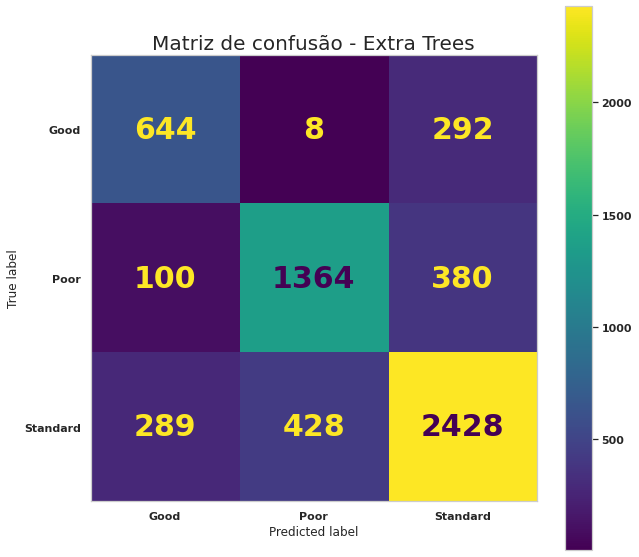

In [60]:
print(classification_report(y_test, y_pred_xt))
cmp1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xt), display_labels=['Good', 'Poor', 'Standard'])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmp1.plot(ax=ax)
plt.rc('font', **font)
plt.title('Matriz de confusão - Extra Trees', fontsize = 20)
plt.show()

In [61]:
r_auc_xt = roc_auc_score(y_test, xtclf.predict_proba(X_test), multi_class = 'ovo')
print('Extra Trees tem AUROC = %.3f' % (r_auc_xt))

Extra Trees tem AUROC = 0.891


### 2º Modelo: Random Forest

In [62]:
# #Otimização Bayesiana de hiperparâmetros
# rfclassifier = RandomForestClassifier(random_state = 42, n_jobs = -1)
# rf_params = {'n_estimators': [500, 1500],
#               'max_depth': [None],
#               'criterion': ['gini']
#                }

# bayessearch_rf = BayesSearchCV(rfclassifier,
#                                rf_params,
#                                cv = 5,
#                                scoring = 'accuracy',
#                                n_jobs = -1,
#                                verbose = 1,
#                                refit = 'accuracy'
#                                ).fit(X_train, y_train)

# y_pred_rf = bayessearch_rf.predict(X_test)
# bayessearch_rf.best_params_

In [63]:
# OrderedDict([('criterion', 'gini'),
#              ('max_depth', None),
#              ('n_estimators', 1441)])

rfclf = RandomForestClassifier(random_state = 42,
                               n_jobs = -1,
                               criterion = 'gini',
                               max_depth = None,
                               n_estimators = 1441).fit(X_train, y_train)

y_pred_rf = rfclf.predict(X_test)

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       944
           1       0.76      0.76      0.76      1844
           2       0.79      0.78      0.78      3145

    accuracy                           0.76      5933
   macro avg       0.73      0.74      0.73      5933
weighted avg       0.76      0.76      0.76      5933



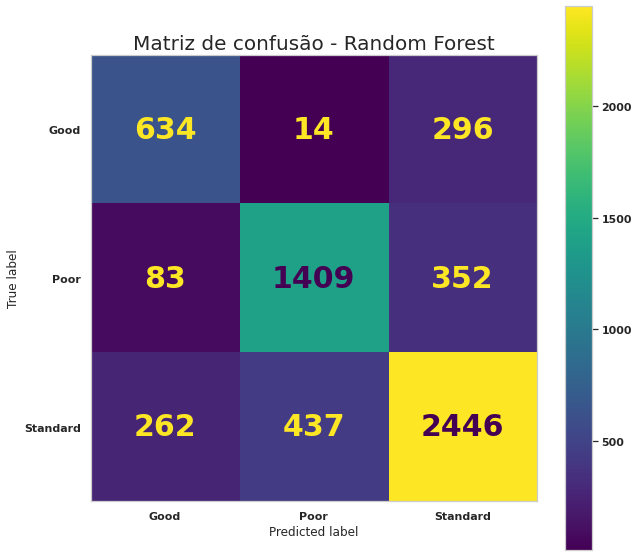

In [64]:
print(classification_report(y_test, y_pred_rf))
cmp1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=['Good', 'Poor', 'Standard'])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmp1.plot(ax=ax)
plt.rc('font', **font)
plt.title('Matriz de confusão - Random Forest', fontsize = 20)
plt.show()

In [65]:
r_auc_rf = roc_auc_score(y_test, rfclf.predict_proba(X_test), multi_class = 'ovo')
print('Random Forest tem AUROC = %.3f' % (r_auc_rf))

Random Forest tem AUROC = 0.895


### 3º Modelo: XGBoost

In [66]:
# #Otimização Bayesiana de hiperparâmetros
# xgbclassifier = XGBClassifier(eval_metric = 'logloss', use_label_encoder = False, random_state = 42)

# xgb_params = {'n_estimators': [5, 750, 1500],
#               'max_depth': [None],
#               'gamma': [0.5, 1, 5],
#               'subsample': [0.2, 1.0],
#               'colsample_bytree': [0.6, 0.8],
#               'min_child_weight': [0.3, 0.7, 1.0],
#               'learning_rate': [0.1, 0.3]
#                }

# OrderedDict([('colsample_bytree', 0.6),
#              ('gamma', 1.0),
#              ('learning_rate', 0.1),
#              ('max_depth', None),
#              ('min_child_weight', 0.7),
#              ('n_estimators', 1500),
#              ('subsample', 1.0)])

# bayessearch_xgbc = BayesSearchCV(xgbclassifier,
#                                  xgb_params,
#                                  cv = 5,
#                                  scoring = 'accuracy',
#                                  refit = 'accuracy',
#                                  verbose = 1,
#                                  n_jobs = -1
#                                  ).fit(X_train, y_train)

# y_pred_xgbc = bayessearch_xgbc.predict(X_test)
# bayessearch_xgbc.best_params_

In [67]:
xgbclassifier = XGBClassifier(eval_metric = 'logloss',
                              use_label_encoder = False,
                              random_state = 42,
                              colsample_bytree = 0.6,
                              gamma = 1.0,
                              learning_rate = 0.1,
                              max_depth = None,
                              min_child_weight = 0.7,
                              n_estimators = 1500,
                              subsample = 1.0).fit(X_test, y_test)

y_pred_xgbc = xgbclassifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       944
           1       0.94      0.95      0.94      1844
           2       0.95      0.95      0.95      3145

    accuracy                           0.95      5933
   macro avg       0.94      0.94      0.94      5933
weighted avg       0.95      0.95      0.95      5933



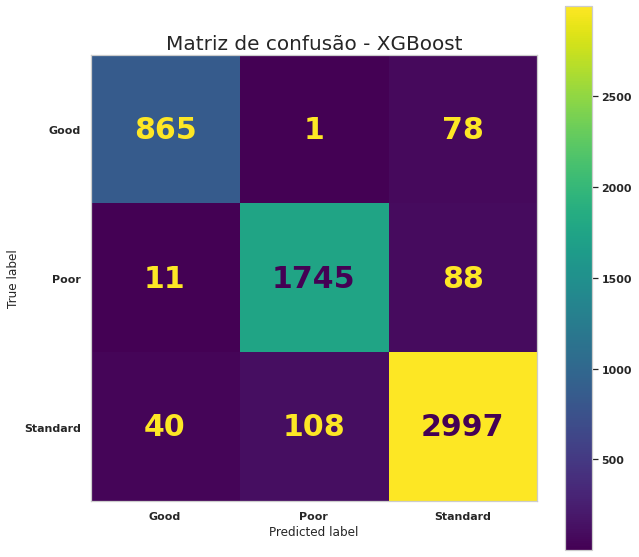

In [68]:
print(classification_report(y_test, y_pred_xgbc))
cmp1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgbc), display_labels=['Good', 'Poor', 'Standard'])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmp1.plot(ax=ax)
plt.rc('font', **font)
plt.title('Matriz de confusão - XGBoost', fontsize = 20)
plt.show()

In [69]:
r_auc_xgbc = roc_auc_score(y_test, xgbclassifier.predict_proba(X_test), multi_class = 'ovo')
print('XGBoost tem AUROC = %.3f' % (r_auc_xgbc))

XGBoost tem AUROC = 0.993


### 4º Modelo: Multi-Layer Perceptron (Rede Neural SKLearn)

In [70]:
# #Otimização Bayesiana de hiperparâmetros
# mlpc = MLPClassifier(random_state = 42, max_iter = 500)

# mlp_params = {'hidden_layer_sizes': [100, 200, 400],
#               'activation': ['tanh'],
#               'solver': ['sgd', 'adam'],
#               'alpha': [0.001, 0.1, 0.3],
#               'learning_rate': ['constant', 'invscaling']
#               }

# bayessearch_mlpc = BayesSearchCV(mlpc,
#                                  mlp_params,
#                                  cv = 3,
#                                  scoring = 'accuracy',
#                                  refit = 'accuracy',
#                                  verbose = 1,
#                                  n_jobs = -1
#                                  ).fit(X_train, y_train)

# y_pred_mlpc = bayessearch_mlpc.predict(X_test)
# bayessearch_mlpc.best_params_

In [71]:
mlpc = MLPClassifier(activation='tanh',
                     alpha=0.1,
                     hidden_layer_sizes=100,
                     learning_rate='invscaling',
                     solver='adam',
                     random_state = 42,
                     max_iter = 500,
                     warm_start=True).fit(X_train, y_train)

y_pred_mlpc = mlpc.predict(X_test)

              precision    recall  f1-score   support

           0       0.50      0.77      0.60       944
           1       0.68      0.64      0.66      1844
           2       0.77      0.67      0.72      3145

    accuracy                           0.68      5933
   macro avg       0.65      0.69      0.66      5933
weighted avg       0.70      0.68      0.68      5933



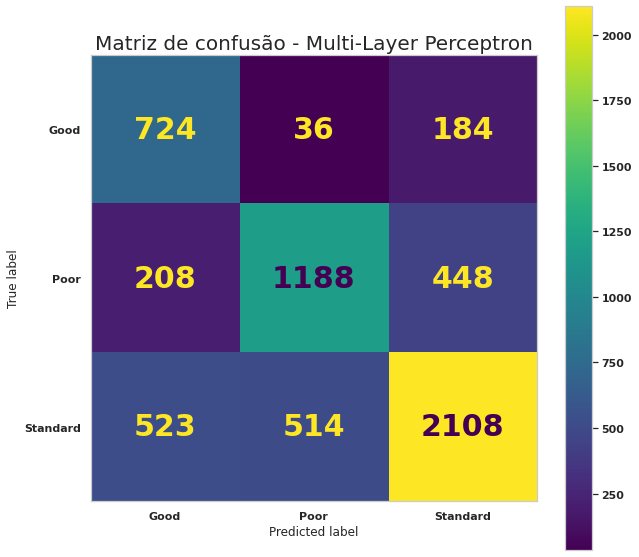

In [72]:
print(classification_report(y_test, y_pred_mlpc))
cmp1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_mlpc), display_labels=['Good', 'Poor', 'Standard'])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmp1.plot(ax=ax)
plt.rc('font', **font)
plt.title('Matriz de confusão - Multi-Layer Perceptron', fontsize = 20)
plt.show()

In [73]:
r_auc_mlp = roc_auc_score(y_test, mlpc.predict_proba(X_test), multi_class = 'ovo')
print('MLP Classifier tem AUROC = %.3f' % (r_auc_mlp))

MLP Classifier tem AUROC = 0.830


### 5º Modelo: Stacking de XGBoost com SVC

In [74]:
# #Otimização Bayesiana de hiperparâmetros
# svc = SVC(random_state=42, max_iter=200)

# svc_params = {'probability': [True, False],
#               'kernel': ['rbf', 'linear', 'poly'],
#               'degree': [2, 3, 4],
#               'C': [0.1, 1.0, 10.0],
#               'gamma': ['scale', 'auto'],
#               'tol': [1e-5],
#               'shrinking': [True, False]
#               }

# bayessearch_svc = BayesSearchCV(svc,
#                                 svc_params,
#                                 cv = 3,
#                                 scoring = 'accuracy',
#                                 refit = 'accuracy',
#                                 verbose = 1,
#                                 n_jobs = -1,
#                                 random_state=42).fit(X_train, y_train)

# y_pred_mlpc = bayessearch_svc.predict(X_test)
# bayessearch_svc.best_params_

In [76]:
estimators = [('xgbc', XGBClassifier(eval_metric = 'logloss',
                                     use_label_encoder = False,
                                     random_state = 42,
                                     colsample_bytree = 0.6,
                                     gamma = 1.0,
                                     learning_rate = 0.1,
                                     max_depth = None,
                                     min_child_weight = 0.7,
                                     n_estimators = 1500,
                                     subsample = 1.0)),
              ('svc', SVC(random_state=42, 
                          C = 0.1,
                          degree = 3,
                          gamma ='scale',
                          kernel = 'poly',
                          probability = False,
                          shrinking = True,
                          tol = 1e-05))
              ]

stackingclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=42, max_iter=400), cv=3).fit(X_train, y_train)

y_pred_stacking = stackingclf.predict(X_test)

              precision    recall  f1-score   support

           0       0.66      0.63      0.65       944
           1       0.76      0.73      0.74      1844
           2       0.76      0.79      0.77      3145

    accuracy                           0.74      5933
   macro avg       0.73      0.71      0.72      5933
weighted avg       0.74      0.74      0.74      5933



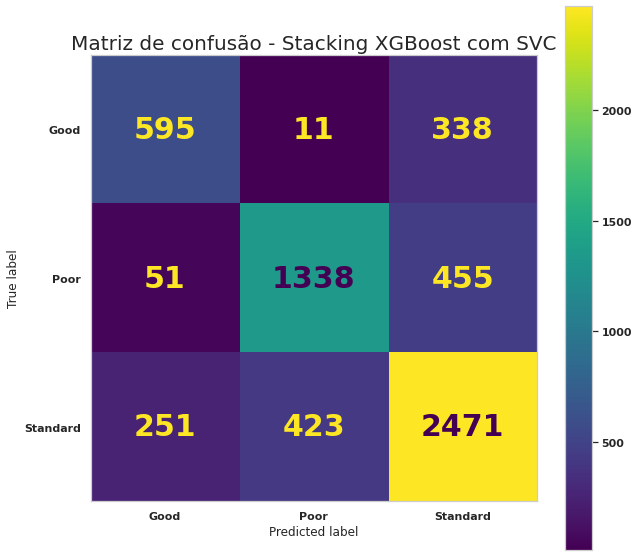

In [77]:
print(classification_report(y_test, y_pred_stacking))
cmp1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_stacking), display_labels=['Good', 'Poor', 'Standard'])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmp1.plot(ax=ax)
plt.rc('font', **font)
plt.title('Matriz de confusão - Stacking XGBoost com SVC', fontsize = 20)
plt.show()

In [78]:
r_auc_stacking = roc_auc_score(y_test, stackingclf.predict_proba(X_test), multi_class = 'ovo')
print('Stacking Classifier tem AUROC = %.3f' % (r_auc_stacking))

Stacking Classifier tem AUROC = 0.883


## Comparativos dos modelos

In [79]:
#Extra Trees: y_pred_xt
#Random Forest: y_pred_rf
#XGBoost: y_pred_xgbc;
#Multi-Layer Perceptron: y_pred_mlpc
#Stacking Classifier: y_pred_stacking

In [80]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, modelname, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC curve - for {modelname}', fontdict={'fontsize': 26})
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.3f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

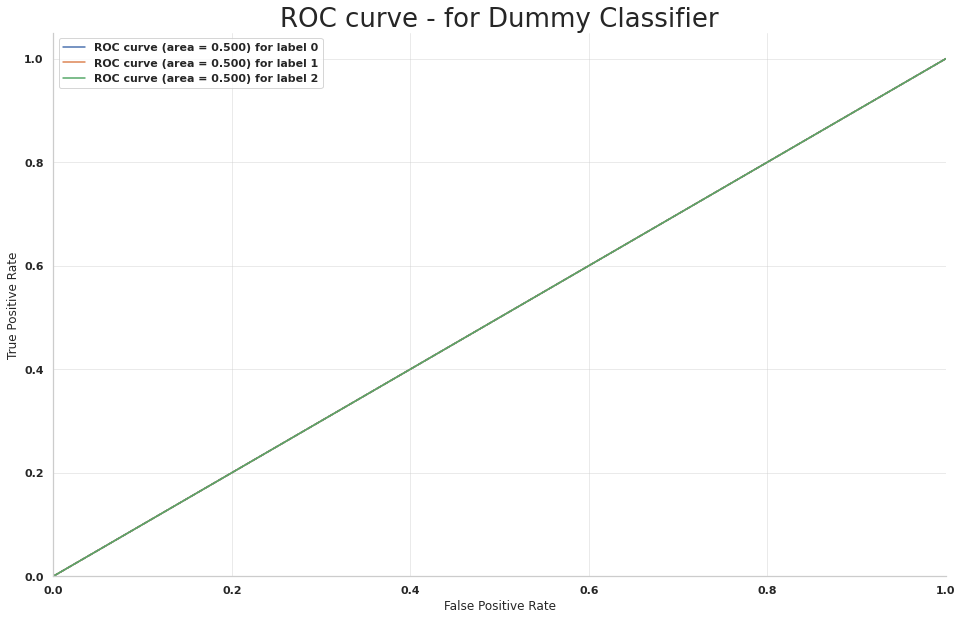

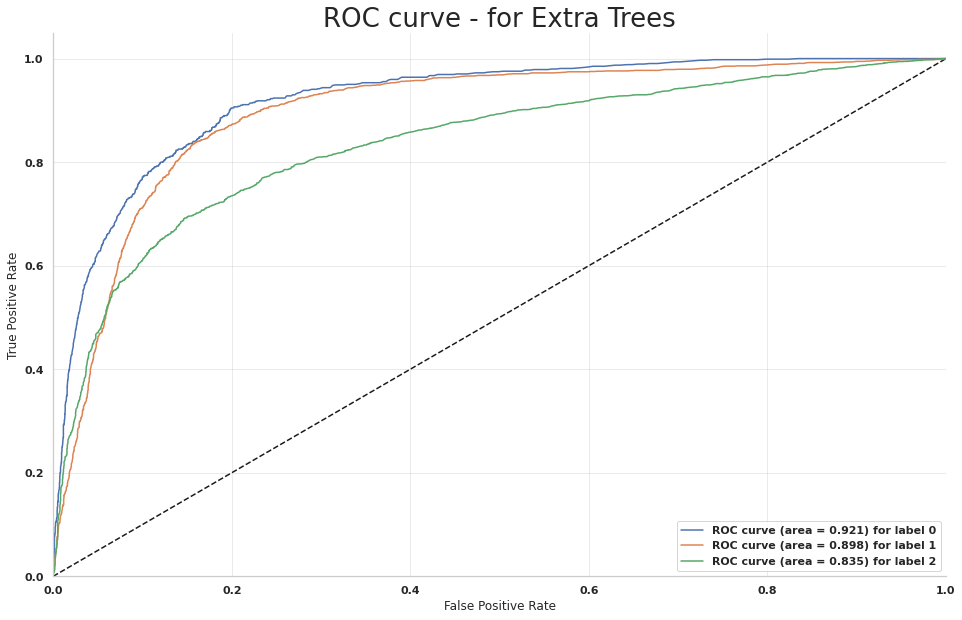

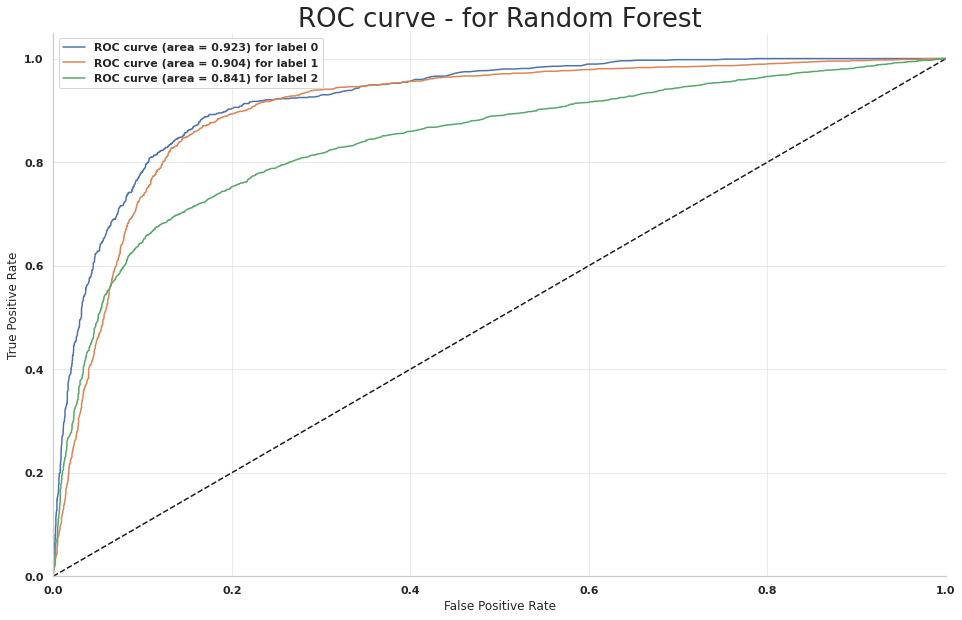

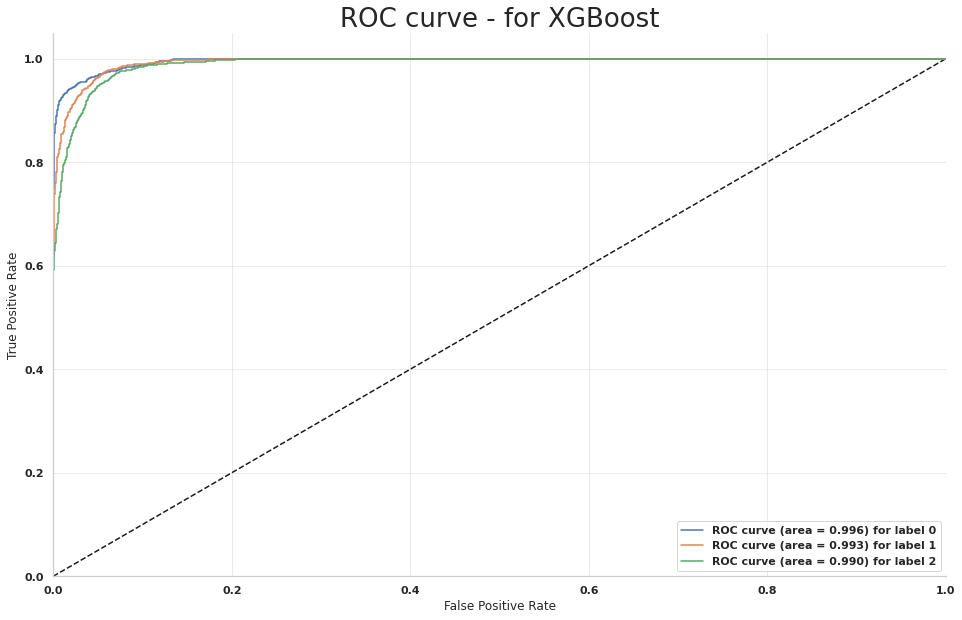

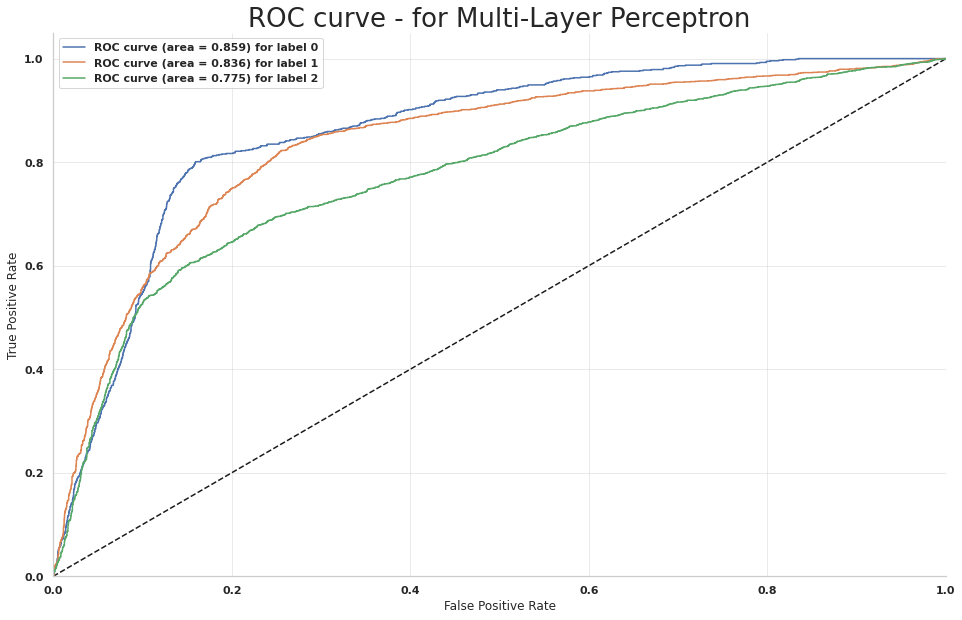

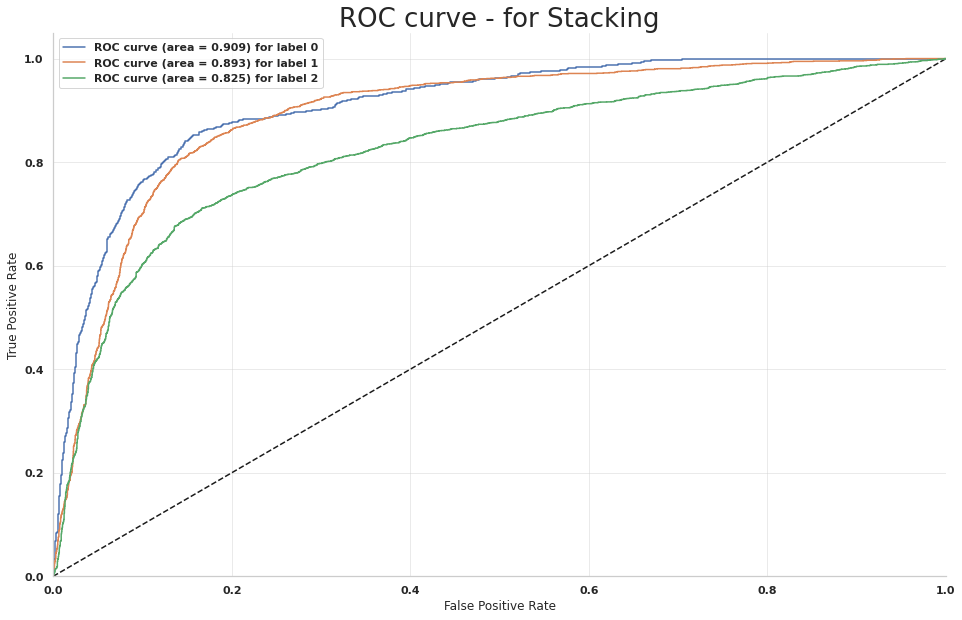

In [81]:
plot_multiclass_roc(dummymodel, X_test, y_test, n_classes = 3, modelname = 'Dummy Classifier', figsize = (16,10))
plot_multiclass_roc(xtclf, X_test, y_test, 3, 'Extra Trees', (16, 10))
plot_multiclass_roc(rfclf, X_test, y_test, 3, 'Random Forest', (16, 10))
plot_multiclass_roc(xgbclassifier, X_test, y_test, 3, 'XGBoost', (16, 10))
plot_multiclass_roc(mlpc, X_test, y_test, 3, 'Multi-Layer Perceptron', (16, 10))
plot_multiclass_roc(stackingclf, X_test, y_test, 3, 'Stacking', (16, 10))

#### Curvas ROC conjuntas (para a classe Standard)

In [82]:
def plot_allmodels_roc(clf, X_test, y_test, figsize=(17, 6)):
    y_score = []

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    
    for i, it in zip(clf, range(len(clf))):
        y_score = i.predict_proba(X_test)[:, 2]
        fpr[it], tpr[it], _ = roc_curve(y_test_dummies[:, 2], y_score)
        roc_auc[it] = auc(fpr[it], tpr[it])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--', label='DummyClassifier (AUC = 0.500)')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC curve for Standard Class (OvR) - All models', fontdict={'fontsize': 26})
    
    for i, it in zip(clf, range(len(clf))):
        ax.plot(fpr[it], tpr[it], label='%s (AUC = %0.3f)' % (i.__class__.__name__, roc_auc[it]))
        
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

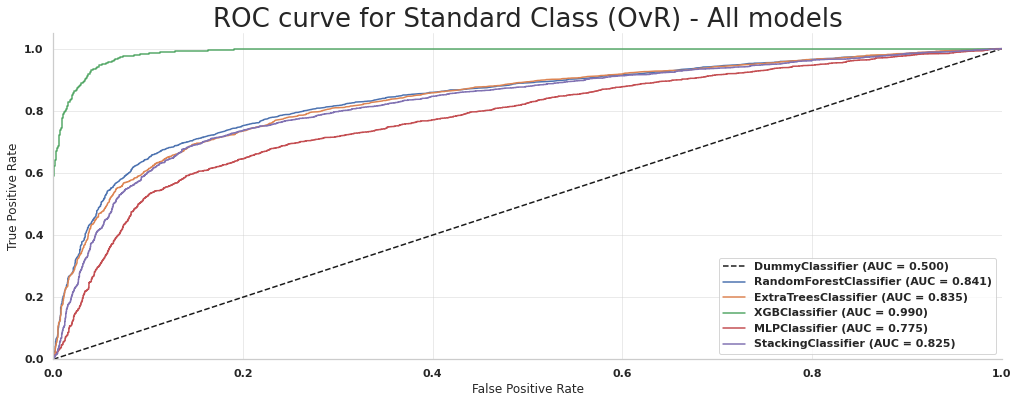

In [83]:
plot_allmodels_roc([rfclf, xtclf, xgbclassifier, mlpc, stackingclf], X_test, y_test)

### Tabela comparativa de Métricas

In [84]:
def perf_measure(y_actual, y_hat):
   
   metricas = []
   TP, FP, TN, FN = 0, 0, 0, 0
   
   TP = confusion_matrix(y_actual, y_hat)[2][2]
   FP = confusion_matrix(y_actual, y_hat)[0][2] + confusion_matrix(y_actual, y_hat)[1][2]
   TN = confusion_matrix(y_actual, y_hat)[0][0] + confusion_matrix(y_actual, y_hat)[0][1] + confusion_matrix(y_actual, y_hat)[1][0] + confusion_matrix(y_actual, y_hat)[1][1]
   FN = confusion_matrix(y_actual, y_hat)[2][0] + confusion_matrix(y_actual, y_hat)[2][1]
   
   metricas.append(TP)
   metricas.append(FP)
   metricas.append(TN)
   metricas.append(FN)
   
   return metricas

In [85]:
comparativo_final_metricas = pd.DataFrame(columns = ['Acurácia', 'Recall', 'FN', 'F1-Score', 'AUROC'])

comparativo_final_metricas.loc['Dummy'] = [accuracy_score(y_test, y_pred_dummy).round(4),
                                           recall_score(y_test, y_pred_dummy, average='macro').round(4),
                                           perf_measure(y_test, y_pred_dummy)[3].sum(),
                                           f1_score(y_test, y_pred_dummy, average='macro').round(4),
                                           r_auc_dummy.round(4)
                                           ]

comparativo_final_metricas.loc['Extra Trees'] = [accuracy_score(y_test, y_pred_xt).round(4),
                                                 recall_score(y_test, y_pred_xt, average='macro').round(4),
                                                 perf_measure(y_test, y_pred_xt)[3].sum(),
                                                 f1_score(y_test, y_pred_xt, average='macro').round(4),
                                                 r_auc_xt.round(4)
                                                 ]

comparativo_final_metricas.loc['Random Forest'] = [accuracy_score(y_test, y_pred_rf).round(4),
                                                   recall_score(y_test, y_pred_rf, average='macro').round(4),
                                                   perf_measure(y_test, y_pred_rf)[3].sum(),
                                                   f1_score(y_test, y_pred_rf, average='macro').round(4),
                                                   r_auc_rf.round(4)
                                                   ]

comparativo_final_metricas.loc['XGBoost'] = [accuracy_score(y_test, y_pred_xgbc).round(4),
                                             recall_score(y_test, y_pred_xgbc, average='macro').round(4),
                                             perf_measure(y_test, y_pred_xgbc)[3].sum(),
                                             f1_score(y_test, y_pred_xgbc, average='macro').round(4),
                                             r_auc_xgbc.round(4)
                                             ]

comparativo_final_metricas.loc['Multi Layer Perceptron'] = [accuracy_score(y_test, y_pred_mlpc).round(4),
                                                            recall_score(y_test, y_pred_mlpc, average='macro').round(4),
                                                            perf_measure(y_test, y_pred_mlpc)[3].sum(),
                                                            f1_score(y_test, y_pred_mlpc, average='macro').round(4),
                                                            r_auc_rf.round(4)
                                                            ]

comparativo_final_metricas.loc['Stacking'] = [accuracy_score(y_test, y_pred_stacking).round(4),
                                              recall_score(y_test, y_pred_stacking, average='macro').round(4),
                                              perf_measure(y_test, y_pred_stacking)[3].sum(),
                                              f1_score(y_test, y_pred_stacking, average='macro').round(4),
                                              r_auc_stacking.round(4)
                                              ]

In [86]:
comparativo_final_metricas = comparativo_final_metricas.sort_values(by='Acurácia', ascending=False)
comparativo_final_metricas

Acurácia  Recall      FN  F1-Score   AUROC
XGBoost                   0.9451  0.9385   148.0    0.9414  0.9934
Random Forest             0.7566  0.7378   699.0    0.7348  0.8949
Extra Trees               0.7477  0.7313   717.0    0.7259  0.8910
Stacking                  0.7423  0.7139   674.0    0.7192  0.8833
Multi Layer Perceptron    0.6776  0.6938  1037.0    0.6611  0.8949
Dummy                     0.5301  0.3333     0.0    0.2310  0.5000

#### FIM